In [60]:
import pandas as pd
from fastai.vision.all import *

learn = load_learner("model/efficientnet_b5/model.pkl")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [61]:
# Load the CSV
df = pd.read_csv("data/bodyfat_dataset.csv")

# OPTION A: Remove by index (e.g., delete row 10)
df = df.drop(index=176)

# OPTION B: Remove by condition (e.g., remove row where filename == '1_image_1.jpg')
# df = df[df['filename'] != '1_image_1.jpg']

# Save back to the same file
df.to_csv("data/bodyfat_datafat.csv", index=False)

In [62]:
def create_regression_csv(df, output_csv="data/image_labels.csv", label_col="meanPrediction", image_prefix="image_", output_dir="images"):
    # Ensure column names are stripped of whitespace
    df.columns = df.columns.str.strip()
    
    image_cols = [col for col in df.columns if col.startswith(image_prefix)]
    records = []

    for idx, row in df.iterrows():
        label = row[label_col]
        for col in image_cols:
            url = row.get(col)
            if isinstance(url, str) and url.startswith("http"):
                ext = url.split('.')[-1].split('?')[0].lower()
                ext = ext if ext in ['jpg', 'jpeg', 'png', 'webp'] else 'jpg'
                filename = f"{idx}_{col}.{ext}"
                records.append({"filename": filename, "target": label})
    
    df_out = pd.DataFrame(records)
    df_out.to_csv(output_csv, index=False)
    print(f"Created {output_csv} with {len(df_out)} labeled images")
    return df_out

In [63]:
create_regression_csv(df)

Created data/image_labels.csv with 1596 labeled images


,filename,target
0,0_image_1.jpg,8.0
1,0_image_2.jpg,8.0
2,0_image_3.jpg,8.0
3,0_image_4.jpg,8.0
4,1_image_1.jpg,9.8
...,...,...
1591,801_image_1.jpg,12.0
1592,802_image_1.jpg,10.5
1593,803_image_1.jpg,15.0
1594,804_image_1.jpg,12.0


In [64]:
from fastai.vision.all import PILImage, show_image
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('data/image_labels_cropped.csv')  # adjust path as needed
df

,filename,target,cropped_path
0,0_image_1.jpg,8.0,NaN
1,0_image_2.jpg,8.0,NaN
2,0_image_3.jpg,8.0,NaN
3,0_image_4.jpg,8.0,cropped_images/0_image_4.jpg
4,1_image_1.jpg,9.8,cropped_images/1_image_1.jpg
...,...,...,...
1591,801_image_1.jpg,12.0,NaN
1592,802_image_1.jpg,10.5,NaN
1593,803_image_1.jpg,15.0,NaN
1594,804_image_1.jpg,12.0,cropped_images/804_image_1.jpg


Processing images:   0%|                                                                                       | 0/1596 [00:00<?, ?it/s]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   0%|▏                                                             | 4/1596 [00:00<01:25, 18.58it/s, last_error=2.04]

Processing images:   0%|▏                                                             | 6/1596 [00:00<01:36, 16.42it/s, last_error=4.61]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   0%|▏                                                             | 6/1596 [00:00<01:36, 16.42it/s, last_error=7.83]

Processing images:   1%|▎                                                             | 8/1596 [00:00<02:54,  9.09it/s, last_error=6.84]

Processing images:   1%|▍                                                            | 10/1596 [00:00<02:22, 11.13it/s, last_error=0.82]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   1%|▍                                                            | 10/1596 [00:00<02:22, 11.13it/s, last_error=0.07]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   1%|▋                                                            | 19/1596 [00:00<01:02, 25.38it/s, last_error=1.63]

Processing images:   1%|▋                                                            | 19/1596 [00:01<01:02, 25.38it/s, last_error=3.44]

Processing images:   1%|▋                                                            | 19/1596 [00:01<01:02, 25.38it/s, last_error=0.01]

Processing images:   1%|▋                                                            | 19/1596 [00:01<01:02, 25.38it/s, last_error=1.84]

Processing images:   1%|▉                                                            | 23/1596 [00:01<01:56, 13.46it/s, last_error=0.06]

Processing images:   1%|▉                                                            | 23/1596 [00:01<01:56, 13.46it/s, last_error=3.61]

Processing images:   1%|▉                                                            | 23/1596 [00:01<01:56, 13.46it/s, last_error=0.43]

Processing images:   2%|▉                                                            | 26/1596 [00:02<02:23, 10.91it/s, last_error=1.95]

Processing images:   2%|▉                                                            | 26/1596 [00:02<02:23, 10.91it/s, last_error=2.10]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   2%|█                                                            | 29/1596 [00:02<02:01, 12.95it/s, last_error=1.63]

Processing images:   2%|█                                                            | 29/1596 [00:02<02:01, 12.95it/s, last_error=0.52]

Processing images:   2%|█                                                            | 29/1596 [00:02<02:01, 12.95it/s, last_error=2.41]

Processing images:   2%|█▏                                                           | 32/1596 [00:02<02:36, 10.01it/s, last_error=0.14]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   2%|█▎                                                           | 34/1596 [00:02<02:31, 10.31it/s, last_error=2.20]

Processing images:   2%|█▎                                                           | 34/1596 [00:02<02:31, 10.31it/s, last_error=1.32]

Processing images:   2%|█▍                                                           | 36/1596 [00:03<03:08,  8.29it/s, last_error=2.56]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   2%|█▍                                                           | 36/1596 [00:03<03:08,  8.29it/s, last_error=1.44]

Processing images:   2%|█▍                                                           | 39/1596 [00:03<02:28, 10.49it/s, last_error=0.38]

Processing images:   3%|█▌                                                           | 41/1596 [00:03<02:20, 11.07it/s, last_error=5.89]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   3%|█▋                                                           | 43/1596 [00:03<02:42,  9.55it/s, last_error=1.33]

Processing images:   3%|█▋                                                           | 43/1596 [00:04<02:42,  9.55it/s, last_error=8.94]

Processing images:   3%|█▋                                                           | 45/1596 [00:04<03:49,  6.75it/s, last_error=1.06]

Processing images:   3%|█▊                                                           | 46/1596 [00:04<04:14,  6.10it/s, last_error=3.87]

Processing images:   3%|█▊                                                           | 46/1596 [00:04<04:14,  6.10it/s, last_error=2.55]

Processing images:   3%|█▊                                                           | 48/1596 [00:04<03:28,  7.43it/s, last_error=2.28]

Processing images:   3%|█▊                                                           | 48/1596 [00:04<03:28,  7.43it/s, last_error=1.29]

Processing images:   3%|█▉                                                           | 50/1596 [00:04<02:50,  9.07it/s, last_error=7.67]

Processing images:   3%|█▉                                                           | 50/1596 [00:04<02:50,  9.07it/s, last_error=1.30]

Processing images:   3%|█▉                                                           | 52/1596 [00:04<02:33, 10.04it/s, last_error=0.78]

Processing images:   3%|█▉                                                           | 52/1596 [00:05<02:33, 10.04it/s, last_error=3.70]

Processing images:   3%|██                                                           | 54/1596 [00:05<03:34,  7.18it/s, last_error=4.97]

Processing images:   4%|██▏                                                          | 56/1596 [00:05<03:14,  7.94it/s, last_error=3.21]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   4%|██▏                                                          | 56/1596 [00:05<03:14,  7.94it/s, last_error=3.13]

Processing images:   4%|██▏                                                          | 58/1596 [00:05<03:24,  7.52it/s, last_error=0.95]

Processing images:   4%|██▏                                                          | 58/1596 [00:05<03:24,  7.52it/s, last_error=4.51]

Processing images:   4%|██▎                                                          | 60/1596 [00:06<02:50,  9.02it/s, last_error=2.23]

Processing images:   4%|██▎                                                          | 60/1596 [00:06<02:50,  9.02it/s, last_error=3.52]

Processing images:   4%|██▎                                                          | 62/1596 [00:06<02:27, 10.43it/s, last_error=3.49]

Processing images:   4%|██▎                                                          | 62/1596 [00:06<02:27, 10.43it/s, last_error=1.99]

Processing images:   4%|██▍                                                          | 64/1596 [00:06<03:02,  8.42it/s, last_error=3.68]

Processing images:   4%|██▍                                                          | 64/1596 [00:06<03:02,  8.42it/s, last_error=1.39]

Processing images:   4%|██▌                                                          | 66/1596 [00:06<03:10,  8.02it/s, last_error=5.72]

Processing images:   4%|██▌                                                          | 67/1596 [00:06<03:32,  7.20it/s, last_error=0.57]

Processing images:   4%|██▌                                                          | 67/1596 [00:07<03:32,  7.20it/s, last_error=0.14]

Processing images:   4%|██▋                                                          | 69/1596 [00:07<02:51,  8.91it/s, last_error=5.74]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   4%|██▋                                                          | 69/1596 [00:07<02:51,  8.91it/s, last_error=0.39]

Processing images:   5%|██▊                                                          | 72/1596 [00:07<02:01, 12.59it/s, last_error=3.35]

Processing images:   5%|██▊                                                          | 72/1596 [00:07<02:01, 12.59it/s, last_error=1.19]

Processing images:   5%|██▊                                                          | 74/1596 [00:07<02:02, 12.42it/s, last_error=0.51]

Processing images:   5%|██▊                                                          | 74/1596 [00:07<02:02, 12.42it/s, last_error=2.15]

Processing images:   5%|██▉                                                          | 76/1596 [00:07<02:41,  9.42it/s, last_error=0.87]

Processing images:   5%|██▉                                                          | 76/1596 [00:07<02:41,  9.42it/s, last_error=3.54]

Processing images:   5%|██▉                                                          | 78/1596 [00:08<03:26,  7.36it/s, last_error=0.14]

Processing images:   5%|██▉                                                          | 78/1596 [00:08<03:26,  7.36it/s, last_error=1.06]

Processing images:   5%|███                                                          | 80/1596 [00:08<02:57,  8.55it/s, last_error=2.95]

Processing images:   5%|███                                                          | 80/1596 [00:08<02:57,  8.55it/s, last_error=5.47]

Processing images:   5%|███▏                                                         | 82/1596 [00:08<02:28, 10.18it/s, last_error=1.44]

Processing images:   5%|███▏                                                         | 82/1596 [00:08<02:28, 10.18it/s, last_error=0.38]

Processing images:   5%|███▏                                                         | 84/1596 [00:08<02:11, 11.51it/s, last_error=0.26]

Processing images:   5%|███▏                                                         | 84/1596 [00:08<02:11, 11.51it/s, last_error=2.30]

Processing images:   5%|███▎                                                         | 86/1596 [00:08<03:05,  8.12it/s, last_error=1.28]

Processing images:   5%|███▎                                                         | 86/1596 [00:09<03:05,  8.12it/s, last_error=3.10]

Processing images:   6%|███▎                                                         | 88/1596 [00:09<03:35,  6.99it/s, last_error=0.34]

Processing images:   6%|███▍                                                         | 89/1596 [00:09<03:31,  7.14it/s, last_error=0.68]

Processing images:   6%|███▍                                                         | 89/1596 [00:09<03:31,  7.14it/s, last_error=0.17]

Processing images:   6%|███▍                                                         | 89/1596 [00:09<03:31,  7.14it/s, last_error=3.11]

Processing images:   6%|███▌                                                         | 92/1596 [00:09<02:36,  9.64it/s, last_error=1.84]

Processing images:   6%|███▌                                                         | 92/1596 [00:09<02:36,  9.64it/s, last_error=2.86]

Processing images:   6%|███▌                                                         | 94/1596 [00:09<03:01,  8.28it/s, last_error=1.01]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   6%|███▋                                                         | 96/1596 [00:10<02:33,  9.80it/s, last_error=2.52]

Processing images:   6%|███▋                                                         | 96/1596 [00:10<02:33,  9.80it/s, last_error=3.43]

Processing images:   6%|███▋                                                         | 98/1596 [00:10<03:14,  7.69it/s, last_error=1.10]

Processing images:   6%|███▋                                                         | 98/1596 [00:10<03:14,  7.69it/s, last_error=3.17]

Processing images:   6%|███▊                                                        | 100/1596 [00:10<02:54,  8.58it/s, last_error=8.83]

Processing images:   6%|███▊                                                        | 100/1596 [00:10<02:54,  8.58it/s, last_error=2.21]

Processing images:   6%|███▊                                                        | 100/1596 [00:10<02:54,  8.58it/s, last_error=4.01]

Processing images:   6%|███▊                                                        | 103/1596 [00:10<02:20, 10.59it/s, last_error=7.18]

Processing images:   6%|███▊                                                        | 103/1596 [00:10<02:20, 10.59it/s, last_error=5.67]

Processing images:   7%|███▉                                                        | 105/1596 [00:11<02:51,  8.70it/s, last_error=4.62]

Processing images:   7%|███▉                                                        | 105/1596 [00:11<02:51,  8.70it/s, last_error=3.52]

Processing images:   7%|████                                                        | 107/1596 [00:11<03:17,  7.54it/s, last_error=9.94]

Processing images:   7%|████                                                        | 108/1596 [00:11<03:28,  7.15it/s, last_error=1.87]

Processing images:   7%|████                                                        | 108/1596 [00:11<03:28,  7.15it/s, last_error=0.11]

Processing images:   7%|████▏                                                       | 110/1596 [00:11<02:47,  8.88it/s, last_error=3.13]

Processing images:   7%|████▏                                                       | 110/1596 [00:11<02:47,  8.88it/s, last_error=0.85]

Processing images:   7%|████▏                                                       | 110/1596 [00:11<02:47,  8.88it/s, last_error=5.47]

Processing images:   7%|████▏                                                       | 113/1596 [00:11<02:11, 11.25it/s, last_error=0.29]

Processing images:   7%|████▏                                                       | 113/1596 [00:12<02:11, 11.25it/s, last_error=1.40]

Processing images:   7%|████▎                                                       | 115/1596 [00:12<02:43,  9.07it/s, last_error=3.24]

Processing images:   7%|████▎                                                       | 115/1596 [00:12<02:43,  9.07it/s, last_error=0.61]

Processing images:   7%|████▍                                                       | 117/1596 [00:12<03:22,  7.32it/s, last_error=3.07]

Processing images:   7%|████▍                                                       | 118/1596 [00:12<03:31,  6.99it/s, last_error=3.13]

Processing images:   7%|████▍                                                       | 118/1596 [00:12<03:31,  6.99it/s, last_error=6.68]

Processing images:   8%|████▌                                                       | 120/1596 [00:12<02:49,  8.70it/s, last_error=0.82]

Processing images:   8%|████▌                                                       | 120/1596 [00:12<02:49,  8.70it/s, last_error=0.79]

Processing images:   8%|████▌                                                      | 122/1596 [00:13<02:19, 10.55it/s, last_error=10.31]

Processing images:   8%|████▌                                                      | 122/1596 [00:13<02:19, 10.55it/s, last_error=14.82]

Processing images:   8%|████▌                                                      | 124/1596 [00:13<03:05,  7.92it/s, last_error=13.31]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   8%|████▊                                                       | 127/1596 [00:13<02:29,  9.79it/s, last_error=2.49]

Processing images:   8%|████▊                                                       | 127/1596 [00:13<02:29,  9.79it/s, last_error=0.84]

Processing images:   8%|████▊                                                       | 129/1596 [00:14<03:14,  7.52it/s, last_error=2.41]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:   8%|████▊                                                       | 129/1596 [00:14<03:14,  7.52it/s, last_error=3.56]

Processing images:   8%|█████                                                       | 133/1596 [00:14<02:24, 10.15it/s, last_error=4.27]

Processing images:   8%|█████                                                       | 133/1596 [00:14<02:24, 10.15it/s, last_error=0.89]

Processing images:   8%|█████                                                       | 135/1596 [00:14<02:41,  9.06it/s, last_error=5.01]

Processing images:   8%|█████                                                       | 135/1596 [00:14<02:41,  9.06it/s, last_error=2.53]

Processing images:   9%|█████▏                                                      | 137/1596 [00:14<02:31,  9.65it/s, last_error=1.49]

Processing images:   9%|█████▏                                                      | 137/1596 [00:15<02:31,  9.65it/s, last_error=1.49]

Processing images:   9%|█████▏                                                      | 139/1596 [00:15<03:16,  7.43it/s, last_error=4.41]

Processing images:   9%|█████▎                                                      | 140/1596 [00:15<03:35,  6.75it/s, last_error=3.02]

Processing images:   9%|█████▎                                                      | 141/1596 [00:15<03:49,  6.35it/s, last_error=2.83]

Processing images:   9%|█████▎                                                      | 142/1596 [00:15<03:49,  6.34it/s, last_error=1.36]

Processing images:   9%|█████▎                                                      | 142/1596 [00:15<03:49,  6.34it/s, last_error=3.05]

Processing images:   9%|█████▍                                                      | 144/1596 [00:15<02:51,  8.49it/s, last_error=2.89]

Processing images:   9%|█████▍                                                      | 144/1596 [00:15<02:51,  8.49it/s, last_error=3.60]

Processing images:   9%|█████▍                                                      | 146/1596 [00:15<02:19, 10.43it/s, last_error=3.58]

Processing images:   9%|█████▍                                                      | 146/1596 [00:16<02:19, 10.43it/s, last_error=1.86]

Processing images:   9%|█████▌                                                      | 148/1596 [00:16<02:21, 10.27it/s, last_error=0.01]

Processing images:   9%|█████▌                                                      | 148/1596 [00:16<02:21, 10.27it/s, last_error=0.40]

Processing images:   9%|█████▋                                                      | 150/1596 [00:16<03:05,  7.80it/s, last_error=1.13]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  10%|█████▋                                                      | 152/1596 [00:16<03:26,  7.00it/s, last_error=2.79]

Processing images:  10%|█████▊                                                      | 153/1596 [00:17<03:17,  7.31it/s, last_error=4.52]

Processing images:  10%|█████▊                                                      | 153/1596 [00:17<03:17,  7.31it/s, last_error=9.12]

Processing images:  10%|█████▊                                                      | 153/1596 [00:17<03:17,  7.31it/s, last_error=0.35]

Processing images:  10%|█████▊                                                      | 156/1596 [00:17<02:22, 10.14it/s, last_error=2.18]

Processing images:  10%|█████▊                                                      | 156/1596 [00:17<02:22, 10.14it/s, last_error=3.82]

Processing images:  10%|█████▉                                                      | 158/1596 [00:17<02:09, 11.11it/s, last_error=1.30]

Processing images:  10%|█████▉                                                      | 158/1596 [00:17<02:09, 11.11it/s, last_error=2.91]

Processing images:  10%|██████                                                      | 160/1596 [00:17<03:13,  7.41it/s, last_error=0.64]

Processing images:  10%|██████                                                      | 160/1596 [00:17<03:13,  7.41it/s, last_error=0.68]

Processing images:  10%|██████                                                      | 162/1596 [00:18<03:53,  6.14it/s, last_error=2.23]

Processing images:  10%|██████                                                      | 162/1596 [00:18<03:53,  6.14it/s, last_error=1.64]

Processing images:  10%|██████▏                                                     | 164/1596 [00:18<03:05,  7.72it/s, last_error=2.01]

Processing images:  10%|██████▏                                                     | 164/1596 [00:18<03:05,  7.72it/s, last_error=0.10]

Processing images:  10%|██████▏                                                     | 166/1596 [00:18<02:53,  8.24it/s, last_error=6.89]

Processing images:  10%|██████▏                                                     | 166/1596 [00:18<02:53,  8.24it/s, last_error=0.95]

Processing images:  11%|██████▎                                                     | 168/1596 [00:18<03:26,  6.91it/s, last_error=1.05]

Processing images:  11%|██████▎                                                     | 169/1596 [00:19<03:46,  6.30it/s, last_error=2.01]

Processing images:  11%|██████▍                                                     | 170/1596 [00:19<04:03,  5.85it/s, last_error=2.40]

Processing images:  11%|██████▍                                                     | 171/1596 [00:19<04:10,  5.68it/s, last_error=2.11]

Processing images:  11%|██████▍                                                     | 171/1596 [00:19<04:10,  5.68it/s, last_error=2.39]

Processing images:  11%|██████▌                                                     | 173/1596 [00:19<03:03,  7.74it/s, last_error=2.07]

Processing images:  11%|██████▌                                                     | 173/1596 [00:19<03:03,  7.74it/s, last_error=1.32]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  11%|██████▌                                                     | 176/1596 [00:19<02:04, 11.39it/s, last_error=2.06]

Processing images:  11%|██████▌                                                     | 176/1596 [00:19<02:04, 11.39it/s, last_error=5.62]

Processing images:  11%|██████▋                                                     | 178/1596 [00:20<02:35,  9.14it/s, last_error=3.41]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  11%|██████▊                                                     | 181/1596 [00:20<02:00, 11.79it/s, last_error=3.15]

Processing images:  11%|██████▊                                                     | 181/1596 [00:20<02:00, 11.79it/s, last_error=3.20]

Processing images:  11%|██████▉                                                     | 183/1596 [00:20<03:06,  7.59it/s, last_error=0.45]

Processing images:  11%|██████▉                                                     | 183/1596 [00:20<03:06,  7.59it/s, last_error=3.23]

Processing images:  12%|██████▉                                                     | 185/1596 [00:20<02:36,  9.04it/s, last_error=3.51]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  12%|██████▉                                                     | 185/1596 [00:20<02:36,  9.04it/s, last_error=2.79]

Processing images:  12%|███████                                                     | 188/1596 [00:21<01:57, 12.03it/s, last_error=0.13]

Processing images:  12%|███████                                                     | 188/1596 [00:21<01:57, 12.03it/s, last_error=2.64]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  12%|███████▏                                                    | 191/1596 [00:21<02:01, 11.56it/s, last_error=1.26]

Processing images:  12%|███████▏                                                    | 191/1596 [00:21<02:01, 11.56it/s, last_error=1.79]

Processing images:  12%|███████▎                                                    | 193/1596 [00:21<02:27,  9.50it/s, last_error=0.53]

Processing images:  12%|███████▎                                                    | 193/1596 [00:21<02:27,  9.50it/s, last_error=0.44]

Processing images:  12%|███████▎                                                    | 195/1596 [00:21<02:09, 10.80it/s, last_error=1.24]

Processing images:  12%|███████▎                                                    | 195/1596 [00:21<02:09, 10.80it/s, last_error=3.08]

Processing images:  12%|███████▍                                                    | 197/1596 [00:22<02:32,  9.15it/s, last_error=1.16]

Processing images:  12%|███████▍                                                    | 197/1596 [00:22<02:32,  9.15it/s, last_error=2.26]

Processing images:  12%|███████▍                                                    | 199/1596 [00:22<02:23,  9.72it/s, last_error=1.15]

Processing images:  12%|███████▍                                                    | 199/1596 [00:22<02:23,  9.72it/s, last_error=0.02]

Processing images:  13%|███████▌                                                    | 201/1596 [00:22<02:30,  9.25it/s, last_error=2.17]

Processing images:  13%|███████▌                                                    | 201/1596 [00:22<02:30,  9.25it/s, last_error=6.93]

Processing images:  13%|███████▋                                                    | 203/1596 [00:22<03:05,  7.53it/s, last_error=2.24]

Processing images:  13%|███████▋                                                    | 203/1596 [00:22<03:05,  7.53it/s, last_error=1.05]

Processing images:  13%|███████▋                                                    | 205/1596 [00:23<03:13,  7.18it/s, last_error=5.12]

Processing images:  13%|███████▋                                                    | 205/1596 [00:23<03:13,  7.18it/s, last_error=4.83]

Processing images:  13%|███████▊                                                    | 207/1596 [00:23<02:41,  8.62it/s, last_error=1.37]

Processing images:  13%|███████▊                                                    | 207/1596 [00:23<02:41,  8.62it/s, last_error=0.31]

Processing images:  13%|███████▊                                                    | 209/1596 [00:23<02:50,  8.16it/s, last_error=7.10]

Processing images:  13%|███████▉                                                    | 210/1596 [00:23<02:47,  8.28it/s, last_error=1.11]

Processing images:  13%|███████▉                                                    | 211/1596 [00:23<02:55,  7.90it/s, last_error=1.55]

Processing images:  13%|███████▉                                                    | 212/1596 [00:23<03:13,  7.17it/s, last_error=2.03]

Processing images:  13%|████████                                                    | 213/1596 [00:24<03:48,  6.06it/s, last_error=0.18]

Processing images:  13%|████████                                                    | 213/1596 [00:24<03:48,  6.06it/s, last_error=0.66]

Processing images:  13%|████████                                                    | 215/1596 [00:24<02:56,  7.81it/s, last_error=2.65]

Processing images:  14%|████████                                                    | 216/1596 [00:24<03:20,  6.88it/s, last_error=1.00]

Processing images:  14%|████████▏                                                   | 217/1596 [00:24<03:18,  6.96it/s, last_error=8.30]

Processing images:  14%|████████▏                                                   | 218/1596 [00:24<03:57,  5.81it/s, last_error=2.57]

Processing images:  14%|████████▏                                                   | 218/1596 [00:25<03:57,  5.81it/s, last_error=1.92]

Processing images:  14%|████████▎                                                   | 220/1596 [00:25<03:26,  6.66it/s, last_error=2.23]

Processing images:  14%|████████▎                                                   | 221/1596 [00:25<03:34,  6.42it/s, last_error=5.68]

Processing images:  14%|████████▎                                                   | 221/1596 [00:25<03:34,  6.42it/s, last_error=1.11]

Processing images:  14%|████████▍                                                   | 223/1596 [00:25<03:23,  6.74it/s, last_error=7.45]

Processing images:  14%|████████▍                                                   | 224/1596 [00:25<03:25,  6.67it/s, last_error=2.40]

Processing images:  14%|████████▍                                                   | 224/1596 [00:25<03:25,  6.67it/s, last_error=2.88]

Processing images:  14%|████████▍                                                   | 226/1596 [00:25<02:36,  8.74it/s, last_error=2.92]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  14%|████████▍                                                   | 226/1596 [00:26<02:36,  8.74it/s, last_error=2.57]

Processing images:  14%|████████▌                                                   | 229/1596 [00:26<02:20,  9.72it/s, last_error=5.91]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  14%|████████▌                                                   | 229/1596 [00:26<02:20,  9.72it/s, last_error=3.23]

Processing images:  15%|████████▋                                                   | 232/1596 [00:26<02:54,  7.81it/s, last_error=6.15]

Processing images:  15%|████████▊                                                   | 233/1596 [00:26<03:06,  7.32it/s, last_error=2.39]

Processing images:  15%|████████▊                                                   | 234/1596 [00:27<03:52,  5.87it/s, last_error=0.51]

Processing images:  15%|████████▊                                                   | 235/1596 [00:27<03:35,  6.32it/s, last_error=1.73]

Processing images:  15%|████████▊                                                   | 236/1596 [00:27<03:22,  6.73it/s, last_error=0.82]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  15%|████████▉                                                   | 238/1596 [00:27<02:46,  8.14it/s, last_error=0.86]

Processing images:  15%|████████▉                                                   | 239/1596 [00:27<02:42,  8.33it/s, last_error=2.75]

Processing images:  15%|████████▉                                                   | 239/1596 [00:27<02:42,  8.33it/s, last_error=1.06]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  15%|█████████                                                   | 242/1596 [00:27<01:59, 11.30it/s, last_error=3.36]

Processing images:  15%|█████████                                                   | 242/1596 [00:27<01:59, 11.30it/s, last_error=1.80]

Processing images:  15%|█████████▏                                                  | 244/1596 [00:28<02:45,  8.19it/s, last_error=2.52]

Processing images:  15%|█████████▏                                                  | 245/1596 [00:28<02:53,  7.79it/s, last_error=3.49]

Processing images:  15%|█████████▏                                                  | 246/1596 [00:28<03:36,  6.25it/s, last_error=4.14]

Processing images:  15%|█████████▎                                                  | 247/1596 [00:28<03:38,  6.17it/s, last_error=9.53]

Processing images:  15%|█████████▎                                                  | 247/1596 [00:28<03:38,  6.17it/s, last_error=5.88]

Processing images:  16%|█████████▎                                                  | 249/1596 [00:29<02:46,  8.09it/s, last_error=0.24]

Processing images:  16%|█████████▎                                                  | 249/1596 [00:29<02:46,  8.09it/s, last_error=2.60]

Processing images:  16%|█████████▍                                                  | 251/1596 [00:29<02:16,  9.88it/s, last_error=1.22]

Processing images:  16%|█████████▍                                                  | 251/1596 [00:29<02:16,  9.88it/s, last_error=8.12]

Processing images:  16%|█████████▌                                                  | 253/1596 [00:29<02:05, 10.67it/s, last_error=0.23]

Processing images:  16%|█████████▌                                                  | 253/1596 [00:29<02:05, 10.67it/s, last_error=6.67]

Processing images:  16%|█████████▌                                                  | 255/1596 [00:30<04:27,  5.00it/s, last_error=4.91]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  16%|█████████▋                                                  | 257/1596 [00:30<03:31,  6.33it/s, last_error=2.21]

Processing images:  16%|█████████▌                                                 | 257/1596 [00:30<03:31,  6.33it/s, last_error=14.28]

Processing images:  16%|█████████▋                                                  | 259/1596 [00:30<04:21,  5.11it/s, last_error=0.55]

Processing images:  16%|█████████▊                                                  | 260/1596 [00:30<03:58,  5.61it/s, last_error=0.87]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  16%|█████████▊                                                  | 260/1596 [00:31<03:58,  5.61it/s, last_error=2.13]

Processing images:  16%|█████████▉                                                  | 263/1596 [00:31<02:46,  8.03it/s, last_error=4.19]

Processing images:  16%|█████████▉                                                  | 263/1596 [00:31<02:46,  8.03it/s, last_error=4.82]

Processing images:  17%|█████████▉                                                  | 265/1596 [00:31<03:02,  7.29it/s, last_error=9.26]

Processing images:  17%|██████████                                                  | 266/1596 [00:31<03:35,  6.18it/s, last_error=3.04]

Processing images:  17%|██████████                                                  | 267/1596 [00:31<03:55,  5.63it/s, last_error=3.54]

Processing images:  17%|██████████                                                  | 268/1596 [00:32<05:05,  4.34it/s, last_error=8.18]

Processing images:  17%|██████████                                                  | 269/1596 [00:32<04:40,  4.73it/s, last_error=2.90]

Processing images:  17%|██████████▏                                                 | 270/1596 [00:32<04:48,  4.60it/s, last_error=7.17]

Processing images:  17%|██████████▏                                                 | 271/1596 [00:32<04:18,  5.12it/s, last_error=0.96]

Processing images:  17%|██████████▏                                                 | 271/1596 [00:32<04:18,  5.12it/s, last_error=3.68]

Processing images:  17%|██████████▎                                                 | 273/1596 [00:33<03:08,  7.01it/s, last_error=1.60]

Processing images:  17%|██████████▎                                                 | 274/1596 [00:33<03:59,  5.52it/s, last_error=2.67]

Processing images:  17%|██████████▎                                                 | 275/1596 [00:33<04:29,  4.91it/s, last_error=0.33]

Processing images:  17%|██████████▍                                                 | 276/1596 [00:34<05:42,  3.85it/s, last_error=2.03]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  17%|██████████▎                                                | 278/1596 [00:34<03:57,  5.55it/s, last_error=12.97]

Processing images:  17%|██████████▎                                                | 278/1596 [00:34<03:57,  5.55it/s, last_error=12.90]

Processing images:  18%|██████████▌                                                 | 280/1596 [00:34<03:12,  6.83it/s, last_error=2.71]

Processing images:  18%|██████████▌                                                 | 280/1596 [00:34<03:12,  6.83it/s, last_error=7.93]

Processing images:  18%|██████████▌                                                 | 282/1596 [00:34<02:41,  8.13it/s, last_error=5.07]

Processing images:  18%|██████████▋                                                 | 283/1596 [00:34<03:07,  7.00it/s, last_error=0.74]

Processing images:  18%|██████████▋                                                 | 284/1596 [00:34<03:41,  5.91it/s, last_error=0.12]

Processing images:  18%|██████████▋                                                 | 285/1596 [00:35<06:01,  3.62it/s, last_error=0.97]

Processing images:  18%|██████████▊                                                 | 286/1596 [00:35<05:17,  4.12it/s, last_error=2.02]

Processing images:  18%|██████████▊                                                 | 287/1596 [00:35<04:29,  4.85it/s, last_error=2.02]

Processing images:  18%|██████████▊                                                 | 287/1596 [00:35<04:29,  4.85it/s, last_error=3.48]

Processing images:  18%|██████████▊                                                 | 289/1596 [00:36<03:33,  6.13it/s, last_error=5.52]

Processing images:  18%|██████████▊                                                 | 289/1596 [00:36<03:33,  6.13it/s, last_error=1.09]

Processing images:  18%|██████████▉                                                 | 291/1596 [00:36<03:05,  7.02it/s, last_error=1.70]

Processing images:  18%|██████████▉                                                 | 292/1596 [00:36<03:26,  6.31it/s, last_error=6.23]

Processing images:  18%|███████████                                                 | 293/1596 [00:36<03:23,  6.42it/s, last_error=3.41]

Processing images:  18%|███████████                                                 | 294/1596 [00:36<03:21,  6.47it/s, last_error=0.18]

Processing images:  18%|███████████                                                 | 295/1596 [00:36<03:31,  6.16it/s, last_error=1.10]

Processing images:  19%|███████████▏                                                | 296/1596 [00:37<04:02,  5.36it/s, last_error=4.78]

Processing images:  19%|███████████▏                                                | 297/1596 [00:37<03:33,  6.08it/s, last_error=0.43]

Processing images:  19%|███████████▏                                                | 297/1596 [00:37<03:33,  6.08it/s, last_error=1.45]

Processing images:  19%|███████████▏                                                | 299/1596 [00:37<02:40,  8.10it/s, last_error=6.00]

Processing images:  19%|███████████▏                                                | 299/1596 [00:37<02:40,  8.10it/s, last_error=2.00]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  19%|███████████▎                                                | 302/1596 [00:37<02:45,  7.82it/s, last_error=3.98]

Processing images:  19%|███████████▍                                                | 303/1596 [00:38<03:24,  6.34it/s, last_error=4.67]

Processing images:  19%|███████████▍                                                | 304/1596 [00:38<03:50,  5.62it/s, last_error=2.44]

Processing images:  19%|███████████▍                                                | 305/1596 [00:38<04:05,  5.26it/s, last_error=4.21]

Processing images:  19%|███████████▍                                                | 305/1596 [00:38<04:05,  5.26it/s, last_error=2.64]

Processing images:  19%|███████████▌                                                | 307/1596 [00:38<03:03,  7.03it/s, last_error=5.29]

Processing images:  19%|███████████▌                                                | 307/1596 [00:38<03:03,  7.03it/s, last_error=7.22]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  19%|███████████▋                                                | 310/1596 [00:38<02:01, 10.59it/s, last_error=0.08]

Processing images:  19%|███████████▋                                                | 310/1596 [00:38<02:01, 10.59it/s, last_error=4.06]

Processing images:  20%|███████████▋                                                | 312/1596 [00:39<02:32,  8.40it/s, last_error=2.56]

Processing images:  20%|███████████▋                                                | 312/1596 [00:39<02:32,  8.40it/s, last_error=3.52]

Processing images:  20%|███████████▊                                                | 314/1596 [00:40<04:21,  4.90it/s, last_error=0.20]

Processing images:  20%|███████████▊                                                | 315/1596 [00:40<05:15,  4.06it/s, last_error=2.22]

Processing images:  20%|███████████▊                                                | 315/1596 [00:40<05:15,  4.06it/s, last_error=1.67]

Processing images:  20%|███████████▉                                                | 317/1596 [00:40<03:59,  5.35it/s, last_error=1.25]

Processing images:  20%|███████████▉                                                | 317/1596 [00:40<03:59,  5.35it/s, last_error=0.67]

Processing images:  20%|███████████▉                                                | 319/1596 [00:40<03:13,  6.60it/s, last_error=2.16]

Processing images:  20%|███████████▉                                                | 319/1596 [00:40<03:13,  6.60it/s, last_error=1.24]

Processing images:  20%|████████████                                                | 321/1596 [00:41<02:54,  7.32it/s, last_error=0.38]

Processing images:  20%|████████████                                                | 322/1596 [00:41<03:13,  6.59it/s, last_error=5.95]

Processing images:  20%|████████████▏                                               | 323/1596 [00:41<03:23,  6.24it/s, last_error=0.77]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  20%|████████████▏                                               | 325/1596 [00:41<03:12,  6.60it/s, last_error=2.65]

Processing images:  20%|████████████▎                                               | 326/1596 [00:41<03:28,  6.09it/s, last_error=2.27]

Processing images:  20%|████████████▎                                               | 327/1596 [00:42<04:13,  5.01it/s, last_error=5.43]

Processing images:  20%|████████████▎                                               | 327/1596 [00:42<04:13,  5.01it/s, last_error=2.28]

Processing images:  21%|████████████▎                                               | 329/1596 [00:42<03:11,  6.63it/s, last_error=0.35]

Processing images:  21%|████████████▎                                               | 329/1596 [00:42<03:11,  6.63it/s, last_error=1.97]

Processing images:  21%|████████████▍                                               | 331/1596 [00:42<02:30,  8.40it/s, last_error=0.69]

Processing images:  21%|████████████▍                                               | 331/1596 [00:42<02:30,  8.40it/s, last_error=0.59]

Processing images:  21%|████████████▌                                               | 333/1596 [00:42<02:09,  9.77it/s, last_error=3.51]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  21%|████████████▌                                               | 335/1596 [00:42<02:27,  8.54it/s, last_error=1.10]

Processing images:  21%|████████████▌                                               | 335/1596 [00:43<02:27,  8.54it/s, last_error=1.59]

Processing images:  21%|████████████▋                                               | 337/1596 [00:43<03:27,  6.07it/s, last_error=0.65]

Processing images:  21%|████████████▋                                               | 338/1596 [00:43<04:49,  4.35it/s, last_error=1.91]

Processing images:  21%|████████████▋                                               | 339/1596 [00:44<04:34,  4.58it/s, last_error=3.29]

Processing images:  21%|████████████▋                                               | 339/1596 [00:44<04:34,  4.58it/s, last_error=2.04]

Processing images:  21%|████████████▊                                               | 341/1596 [00:44<03:28,  6.01it/s, last_error=2.31]

Processing images:  21%|████████████▊                                               | 341/1596 [00:44<03:28,  6.01it/s, last_error=0.89]

Processing images:  21%|████████████▉                                               | 343/1596 [00:44<02:56,  7.09it/s, last_error=1.17]

Processing images:  21%|████████████▉                                               | 343/1596 [00:44<02:56,  7.09it/s, last_error=3.07]

Processing images:  22%|████████████▉                                               | 345/1596 [00:44<02:34,  8.10it/s, last_error=2.15]

Processing images:  22%|████████████▉                                               | 345/1596 [00:44<02:34,  8.10it/s, last_error=0.61]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  22%|█████████████                                               | 348/1596 [00:45<02:27,  8.45it/s, last_error=0.35]

Processing images:  22%|█████████████                                               | 349/1596 [00:45<02:46,  7.47it/s, last_error=1.29]

Processing images:  22%|█████████████▏                                              | 350/1596 [00:45<03:39,  5.69it/s, last_error=4.56]

Processing images:  22%|█████████████▏                                              | 351/1596 [00:46<04:52,  4.26it/s, last_error=1.75]

Processing images:  22%|█████████████▏                                              | 352/1596 [00:46<04:18,  4.82it/s, last_error=3.47]

Processing images:  22%|█████████████▏                                              | 352/1596 [00:46<04:18,  4.82it/s, last_error=5.30]

Processing images:  22%|█████████████▎                                              | 354/1596 [00:46<03:05,  6.70it/s, last_error=1.73]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  22%|█████████████▎                                              | 354/1596 [00:46<03:05,  6.70it/s, last_error=1.93]

Processing images:  22%|█████████████▍                                              | 357/1596 [00:46<02:13,  9.27it/s, last_error=1.76]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  22%|█████████████▍                                              | 359/1596 [00:46<01:54, 10.83it/s, last_error=6.15]

Processing images:  22%|█████████████▍                                              | 359/1596 [00:46<01:54, 10.83it/s, last_error=1.47]

Processing images:  23%|█████████████▌                                              | 361/1596 [00:47<03:08,  6.55it/s, last_error=4.31]

Processing images:  23%|█████████████▌                                              | 361/1596 [00:47<03:08,  6.55it/s, last_error=0.07]

Processing images:  23%|█████████████▋                                              | 363/1596 [00:47<03:22,  6.09it/s, last_error=5.29]

Processing images:  23%|█████████████▋                                              | 363/1596 [00:47<03:22,  6.09it/s, last_error=6.91]

Processing images:  23%|█████████████▋                                              | 365/1596 [00:47<02:40,  7.66it/s, last_error=1.09]

Processing images:  23%|█████████████▋                                              | 365/1596 [00:47<02:40,  7.66it/s, last_error=3.58]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  23%|█████████████▋                                              | 365/1596 [00:47<02:40,  7.66it/s, last_error=6.22]

Processing images:  23%|█████████████▊                                              | 369/1596 [00:47<01:47, 11.43it/s, last_error=0.36]

Processing images:  23%|█████████████▊                                              | 369/1596 [00:47<01:47, 11.43it/s, last_error=1.65]

Processing images:  23%|█████████████▉                                              | 371/1596 [00:48<02:10,  9.40it/s, last_error=3.69]

Processing images:  23%|██████████████                                              | 373/1596 [00:48<02:11,  9.29it/s, last_error=0.09]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  23%|██████████████                                              | 375/1596 [00:48<02:25,  8.38it/s, last_error=2.25]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  23%|██████████████                                              | 375/1596 [00:48<02:25,  8.38it/s, last_error=2.08]

Processing images:  24%|██████████████▏                                             | 377/1596 [00:48<02:13,  9.15it/s, last_error=1.09]

Processing images:  24%|██████████████▏                                             | 377/1596 [00:48<02:13,  9.15it/s, last_error=1.31]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  24%|██████████████▍                                             | 383/1596 [00:48<01:12, 16.64it/s, last_error=0.02]

Processing images:  24%|██████████████▍                                             | 383/1596 [00:48<01:12, 16.64it/s, last_error=1.82]

Processing images:  24%|██████████████▌                                             | 386/1596 [00:49<01:05, 18.54it/s, last_error=0.44]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  24%|██████████████▌                                             | 386/1596 [00:49<01:05, 18.54it/s, last_error=2.54]

Processing images:  24%|██████████████▌                                             | 386/1596 [00:49<01:05, 18.54it/s, last_error=2.79]

Processing images:  24%|██████████████▌                                             | 389/1596 [00:49<01:51, 10.84it/s, last_error=5.42]

Processing images:  24%|██████████████▋                                             | 391/1596 [00:49<01:58, 10.18it/s, last_error=0.07]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  24%|██████████████▋                                             | 391/1596 [00:50<01:58, 10.18it/s, last_error=6.63]

Processing images:  25%|██████████████▊                                             | 393/1596 [00:50<02:07,  9.46it/s, last_error=3.78]

Processing images:  25%|██████████████▊                                             | 393/1596 [00:50<02:07,  9.46it/s, last_error=2.96]

Processing images:  25%|██████████████▊                                             | 393/1596 [00:50<02:07,  9.46it/s, last_error=5.12]

Processing images:  25%|██████████████▉                                             | 396/1596 [00:50<01:47, 11.13it/s, last_error=5.30]

Processing images:  25%|██████████████▉                                             | 396/1596 [00:50<01:47, 11.13it/s, last_error=3.96]

Processing images:  25%|██████████████▉                                             | 398/1596 [00:50<02:05,  9.51it/s, last_error=0.43]

Processing images:  25%|██████████████▉                                             | 398/1596 [00:50<02:05,  9.51it/s, last_error=1.60]

Processing images:  25%|███████████████                                             | 400/1596 [00:50<02:32,  7.83it/s, last_error=0.15]

Processing images:  25%|███████████████                                             | 401/1596 [00:51<02:52,  6.91it/s, last_error=2.04]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  25%|███████████████▏                                            | 405/1596 [00:51<01:47, 11.05it/s, last_error=4.74]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  25%|███████████████▏                                            | 405/1596 [00:51<01:47, 11.05it/s, last_error=3.05]

Processing images:  26%|███████████████▍                                            | 411/1596 [00:51<01:06, 17.84it/s, last_error=0.77]

Processing images:  26%|███████████████▍                                            | 411/1596 [00:51<01:06, 17.84it/s, last_error=3.17]

Processing images:  26%|███████████████▍                                            | 411/1596 [00:51<01:06, 17.84it/s, last_error=2.26]

Processing images:  26%|███████████████▌                                            | 414/1596 [00:51<01:29, 13.20it/s, last_error=4.68]

Processing images:  26%|███████████████▌                                            | 414/1596 [00:52<01:29, 13.20it/s, last_error=2.73]

Processing images:  26%|███████████████▋                                            | 416/1596 [00:52<02:48,  6.99it/s, last_error=1.00]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  26%|███████████████▋                                            | 418/1596 [00:52<02:26,  8.06it/s, last_error=3.36]

Processing images:  26%|███████████████▋                                            | 418/1596 [00:52<02:26,  8.06it/s, last_error=2.76]

Processing images:  26%|███████████████▊                                            | 420/1596 [00:52<02:06,  9.32it/s, last_error=0.31]

Processing images:  26%|███████████████▌                                           | 420/1596 [00:52<02:06,  9.32it/s, last_error=15.21]

Processing images:  26%|███████████████▊                                            | 422/1596 [00:53<01:50, 10.58it/s, last_error=6.71]

Processing images:  26%|███████████████▊                                            | 422/1596 [00:53<01:50, 10.58it/s, last_error=5.30]

Processing images:  27%|███████████████▉                                            | 424/1596 [00:53<01:42, 11.46it/s, last_error=6.57]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  27%|████████████████                                            | 427/1596 [00:53<01:19, 14.63it/s, last_error=1.40]

Processing images:  27%|████████████████                                            | 427/1596 [00:53<01:19, 14.63it/s, last_error=0.13]

Processing images:  27%|████████████████▏                                           | 429/1596 [00:54<03:29,  5.56it/s, last_error=0.22]

Processing images:  27%|████████████████▏                                           | 429/1596 [00:54<03:29,  5.56it/s, last_error=5.10]

Processing images:  27%|████████████████▏                                           | 431/1596 [00:54<02:53,  6.71it/s, last_error=3.57]

Processing images:  27%|████████████████▏                                           | 431/1596 [00:54<02:53,  6.71it/s, last_error=2.23]

Processing images:  27%|████████████████▎                                           | 433/1596 [00:54<02:29,  7.77it/s, last_error=2.34]

Processing images:  27%|████████████████▎                                           | 433/1596 [00:54<02:29,  7.77it/s, last_error=0.08]

Processing images:  27%|████████████████▎                                           | 435/1596 [00:54<02:09,  8.93it/s, last_error=4.75]

Processing images:  27%|████████████████▍                                           | 437/1596 [00:55<02:36,  7.39it/s, last_error=1.46]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  27%|████████████████▍                                           | 437/1596 [00:55<02:36,  7.39it/s, last_error=0.04]

Processing images:  28%|████████████████▌                                           | 439/1596 [00:55<03:34,  5.39it/s, last_error=0.76]

Processing images:  28%|████████████████▌                                           | 439/1596 [00:55<03:34,  5.39it/s, last_error=1.87]

Processing images:  28%|████████████████▌                                           | 441/1596 [00:55<02:55,  6.57it/s, last_error=3.27]

Processing images:  28%|████████████████▌                                           | 441/1596 [00:55<02:55,  6.57it/s, last_error=2.65]

Processing images:  28%|████████████████▋                                           | 443/1596 [00:55<02:26,  7.85it/s, last_error=3.73]

Processing images:  28%|████████████████▋                                           | 443/1596 [00:56<02:26,  7.85it/s, last_error=0.84]

Processing images:  28%|████████████████▋                                           | 445/1596 [00:56<03:33,  5.40it/s, last_error=0.22]

Processing images:  28%|████████████████▊                                           | 446/1596 [00:56<03:36,  5.30it/s, last_error=0.48]

Processing images:  28%|████████████████▊                                           | 447/1596 [00:57<04:00,  4.78it/s, last_error=0.06]

Processing images:  28%|████████████████▊                                           | 447/1596 [00:57<04:00,  4.78it/s, last_error=2.20]

Processing images:  28%|████████████████▉                                           | 449/1596 [00:57<03:00,  6.37it/s, last_error=3.66]

Processing images:  28%|████████████████▉                                           | 449/1596 [00:57<03:00,  6.37it/s, last_error=2.13]

Processing images:  28%|████████████████▉                                           | 451/1596 [00:57<02:20,  8.15it/s, last_error=1.19]

Processing images:  28%|████████████████▉                                           | 451/1596 [00:57<02:20,  8.15it/s, last_error=0.37]

Processing images:  28%|████████████████▋                                          | 453/1596 [00:57<02:41,  7.08it/s, last_error=10.86]

Processing images:  28%|█████████████████                                           | 454/1596 [00:57<03:00,  6.34it/s, last_error=8.78]

Processing images:  29%|█████████████████                                           | 455/1596 [00:58<03:11,  5.97it/s, last_error=6.11]

Processing images:  29%|████████████████▊                                          | 456/1596 [00:58<03:23,  5.59it/s, last_error=13.55]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  29%|█████████████████▎                                          | 459/1596 [00:58<02:00,  9.43it/s, last_error=1.32]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  29%|█████████████████▎                                          | 459/1596 [00:58<02:00,  9.43it/s, last_error=4.31]

Processing images:  29%|█████████████████▎                                          | 461/1596 [00:58<01:40, 11.34it/s, last_error=0.59]

Processing images:  29%|█████████████████▎                                          | 461/1596 [00:58<01:40, 11.34it/s, last_error=1.30]

Processing images:  29%|█████████████████▍                                          | 463/1596 [00:58<01:30, 12.46it/s, last_error=1.05]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  29%|█████████████████▍                                          | 465/1596 [00:59<02:06,  8.91it/s, last_error=4.25]

Processing images:  29%|█████████████████▍                                          | 465/1596 [00:59<02:06,  8.91it/s, last_error=7.22]

Processing images:  29%|█████████████████▌                                          | 467/1596 [00:59<02:42,  6.94it/s, last_error=0.57]

Processing images:  29%|█████████████████▌                                          | 467/1596 [00:59<02:42,  6.94it/s, last_error=1.89]

Processing images:  29%|█████████████████▋                                          | 469/1596 [00:59<03:15,  5.76it/s, last_error=3.75]

Processing images:  29%|█████████████████▋                                          | 469/1596 [01:00<03:15,  5.76it/s, last_error=0.87]

Processing images:  30%|█████████████████▋                                          | 471/1596 [01:00<02:34,  7.27it/s, last_error=0.34]

Processing images:  30%|█████████████████▋                                          | 471/1596 [01:00<02:34,  7.27it/s, last_error=0.49]

Processing images:  30%|█████████████████▊                                          | 473/1596 [01:00<02:13,  8.42it/s, last_error=0.76]

Processing images:  30%|█████████████████▊                                          | 473/1596 [01:00<02:13,  8.42it/s, last_error=0.85]

Processing images:  30%|█████████████████▊                                          | 475/1596 [01:00<01:55,  9.74it/s, last_error=1.45]

Processing images:  30%|█████████████████▊                                          | 475/1596 [01:00<01:55,  9.74it/s, last_error=1.98]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  30%|█████████████████▉                                          | 478/1596 [01:00<01:42, 10.93it/s, last_error=4.44]

Processing images:  30%|█████████████████▉                                          | 478/1596 [01:00<01:42, 10.93it/s, last_error=6.43]

Processing images:  30%|██████████████████                                          | 480/1596 [01:01<02:34,  7.21it/s, last_error=2.62]

Processing images:  30%|██████████████████                                          | 480/1596 [01:01<02:34,  7.21it/s, last_error=3.30]

Processing images:  30%|██████████████████                                          | 482/1596 [01:01<02:59,  6.21it/s, last_error=6.67]

Processing images:  30%|██████████████████                                          | 482/1596 [01:01<02:59,  6.21it/s, last_error=0.37]

Processing images:  30%|██████████████████▏                                         | 484/1596 [01:01<02:24,  7.70it/s, last_error=0.54]

Processing images:  30%|██████████████████▏                                         | 484/1596 [01:01<02:24,  7.70it/s, last_error=0.43]

Processing images:  30%|██████████████████▎                                         | 486/1596 [01:01<02:04,  8.92it/s, last_error=2.45]

Processing images:  30%|██████████████████▎                                         | 486/1596 [01:02<02:04,  8.92it/s, last_error=3.36]

Processing images:  31%|██████████████████▎                                         | 488/1596 [01:02<02:45,  6.69it/s, last_error=1.08]

Processing images:  31%|██████████████████▎                                         | 488/1596 [01:02<02:45,  6.69it/s, last_error=0.37]

Processing images:  31%|██████████████████▍                                         | 490/1596 [01:02<03:19,  5.55it/s, last_error=0.28]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  31%|██████████████████▍                                         | 492/1596 [01:02<02:49,  6.51it/s, last_error=8.28]

Processing images:  31%|██████████████████▍                                         | 492/1596 [01:03<02:49,  6.51it/s, last_error=3.54]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  31%|██████████████████▌                                         | 495/1596 [01:03<02:04,  8.81it/s, last_error=3.01]

Processing images:  31%|██████████████████▌                                         | 495/1596 [01:03<02:04,  8.81it/s, last_error=3.06]

Processing images:  31%|██████████████████▋                                         | 497/1596 [01:03<02:25,  7.57it/s, last_error=0.78]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  31%|██████████████████▊                                         | 499/1596 [01:03<02:22,  7.70it/s, last_error=3.30]

Processing images:  31%|██████████████████▊                                         | 500/1596 [01:03<02:38,  6.91it/s, last_error=1.09]

Processing images:  31%|██████████████████▊                                         | 501/1596 [01:04<02:53,  6.31it/s, last_error=0.66]

Processing images:  31%|██████████████████▊                                         | 501/1596 [01:04<02:53,  6.31it/s, last_error=0.17]

Processing images:  32%|██████████████████▉                                         | 503/1596 [01:04<02:15,  8.05it/s, last_error=0.33]

Processing images:  32%|██████████████████▉                                         | 503/1596 [01:04<02:15,  8.05it/s, last_error=0.38]

Processing images:  32%|██████████████████▉                                         | 503/1596 [01:04<02:15,  8.05it/s, last_error=8.72]

Processing images:  32%|███████████████████                                         | 506/1596 [01:04<01:40, 10.89it/s, last_error=3.28]

Processing images:  32%|███████████████████                                         | 506/1596 [01:04<01:40, 10.89it/s, last_error=0.49]

Processing images:  32%|███████████████████                                         | 508/1596 [01:04<01:28, 12.27it/s, last_error=9.35]

Processing images:  32%|███████████████████                                         | 508/1596 [01:04<01:28, 12.27it/s, last_error=1.76]

Processing images:  32%|███████████████████▏                                        | 510/1596 [01:04<01:47, 10.12it/s, last_error=4.08]

Processing images:  32%|███████████████████▏                                        | 510/1596 [01:04<01:47, 10.12it/s, last_error=0.76]

Processing images:  32%|███████████████████▏                                        | 512/1596 [01:05<01:54,  9.45it/s, last_error=1.47]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  32%|███████████████████▎                                        | 514/1596 [01:05<01:51,  9.66it/s, last_error=0.60]

Processing images:  32%|███████████████████▎                                        | 514/1596 [01:05<01:51,  9.66it/s, last_error=0.91]

Processing images:  32%|███████████████████▍                                        | 516/1596 [01:05<01:56,  9.25it/s, last_error=0.80]

Processing images:  32%|███████████████████▍                                        | 516/1596 [01:05<01:56,  9.25it/s, last_error=4.51]

Processing images:  32%|███████████████████▍                                        | 516/1596 [01:05<01:56,  9.25it/s, last_error=5.32]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  33%|███████████████████▌                                        | 520/1596 [01:05<01:21, 13.16it/s, last_error=2.33]

Processing images:  33%|███████████████████▌                                        | 520/1596 [01:05<01:21, 13.16it/s, last_error=1.09]

Processing images:  33%|███████████████████▌                                        | 522/1596 [01:06<02:05,  8.56it/s, last_error=2.12]

Processing images:  33%|███████████████████▌                                        | 522/1596 [01:06<02:05,  8.56it/s, last_error=5.66]

Processing images:  33%|███████████████████▋                                        | 524/1596 [01:06<02:17,  7.79it/s, last_error=2.06]

Processing images:  33%|███████████████████▊                                        | 526/1596 [01:06<02:12,  8.05it/s, last_error=2.29]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  33%|███████████████████▊                                        | 526/1596 [01:06<02:12,  8.05it/s, last_error=1.18]

Processing images:  33%|███████████████████▊                                        | 528/1596 [01:06<01:55,  9.28it/s, last_error=0.77]

Processing images:  33%|███████████████████▊                                        | 528/1596 [01:06<01:55,  9.28it/s, last_error=2.51]

Processing images:  33%|███████████████████▉                                        | 530/1596 [01:06<01:39, 10.76it/s, last_error=0.46]

Processing images:  33%|███████████████████▉                                        | 530/1596 [01:06<01:39, 10.76it/s, last_error=2.63]

Processing images:  33%|████████████████████                                        | 532/1596 [01:07<01:30, 11.76it/s, last_error=3.20]

Processing images:  33%|████████████████████                                        | 532/1596 [01:07<01:30, 11.76it/s, last_error=2.34]

Processing images:  33%|████████████████████                                        | 534/1596 [01:07<02:12,  8.02it/s, last_error=2.94]

Processing images:  33%|████████████████████                                        | 534/1596 [01:07<02:12,  8.02it/s, last_error=0.65]

Processing images:  34%|████████████████████▏                                       | 536/1596 [01:07<02:46,  6.35it/s, last_error=0.25]

Processing images:  34%|████████████████████▎                                       | 539/1596 [01:08<01:55,  9.14it/s, last_error=1.69]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  34%|████████████████████▎                                       | 539/1596 [01:08<01:55,  9.14it/s, last_error=0.54]

Processing images:  34%|████████████████████▎                                       | 541/1596 [01:08<01:42, 10.29it/s, last_error=3.78]

Processing images:  34%|████████████████████▎                                       | 541/1596 [01:08<01:42, 10.29it/s, last_error=1.17]

Processing images:  34%|████████████████████▍                                       | 543/1596 [01:08<01:32, 11.41it/s, last_error=4.43]

Processing images:  34%|████████████████████▍                                       | 543/1596 [01:08<01:32, 11.41it/s, last_error=2.87]

Processing images:  34%|████████████████████▍                                       | 545/1596 [01:08<02:20,  7.48it/s, last_error=2.19]

Processing images:  34%|████████████████████▌                                       | 547/1596 [01:09<02:19,  7.51it/s, last_error=1.30]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  34%|████████████████████▌                                       | 547/1596 [01:09<02:19,  7.51it/s, last_error=0.38]

Processing images:  34%|████████████████████▋                                       | 549/1596 [01:09<02:18,  7.55it/s, last_error=2.64]

Processing images:  34%|████████████████████▋                                       | 549/1596 [01:09<02:18,  7.55it/s, last_error=2.02]

Processing images:  35%|████████████████████▊                                       | 552/1596 [01:09<01:38, 10.58it/s, last_error=2.32]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  35%|████████████████████▊                                       | 552/1596 [01:09<01:38, 10.58it/s, last_error=1.20]

Processing images:  35%|████████████████████▊                                       | 554/1596 [01:09<01:43, 10.11it/s, last_error=0.87]

Processing images:  35%|████████████████████▊                                       | 554/1596 [01:09<01:43, 10.11it/s, last_error=0.37]

Processing images:  35%|████████████████████▉                                       | 556/1596 [01:10<02:42,  6.40it/s, last_error=0.56]

Processing images:  35%|████████████████████▉                                       | 556/1596 [01:10<02:42,  6.40it/s, last_error=4.90]

Processing images:  35%|████████████████████▉                                       | 558/1596 [01:10<02:40,  6.48it/s, last_error=2.92]

Processing images:  35%|█████████████████████                                       | 559/1596 [01:10<03:01,  5.71it/s, last_error=0.03]

Processing images:  35%|█████████████████████                                       | 559/1596 [01:10<03:01,  5.71it/s, last_error=1.35]

Processing images:  35%|█████████████████████                                       | 561/1596 [01:11<02:32,  6.79it/s, last_error=1.85]

Processing images:  35%|█████████████████████                                       | 561/1596 [01:11<02:32,  6.79it/s, last_error=1.42]

Processing images:  35%|█████████████████████▏                                      | 563/1596 [01:11<02:06,  8.16it/s, last_error=1.40]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  35%|█████████████████████▏                                      | 565/1596 [01:11<02:10,  7.92it/s, last_error=2.85]

Processing images:  35%|█████████████████████▎                                      | 566/1596 [01:11<02:18,  7.43it/s, last_error=2.88]

Processing images:  36%|█████████████████████▎                                      | 567/1596 [01:11<02:50,  6.02it/s, last_error=5.22]

Processing images:  36%|█████████████████████▎                                      | 568/1596 [01:12<03:00,  5.68it/s, last_error=4.86]

Processing images:  36%|█████████████████████▎                                      | 568/1596 [01:12<03:00,  5.68it/s, last_error=6.51]

Processing images:  36%|█████████████████████▍                                      | 570/1596 [01:12<02:14,  7.62it/s, last_error=4.48]

Processing images:  36%|█████████████████████▍                                      | 570/1596 [01:12<02:14,  7.62it/s, last_error=7.06]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  36%|█████████████████████▌                                      | 573/1596 [01:12<01:32, 11.11it/s, last_error=0.01]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  36%|█████████████████████▌                                      | 573/1596 [01:12<01:32, 11.11it/s, last_error=2.52]

Processing images:  36%|█████████████████████▋                                      | 576/1596 [01:12<01:11, 14.18it/s, last_error=2.56]

Processing images:  36%|█████████████████████▋                                      | 578/1596 [01:12<01:18, 13.00it/s, last_error=2.44]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  36%|█████████████████████▊                                      | 580/1596 [01:12<01:29, 11.33it/s, last_error=5.97]

Processing images:  36%|█████████████████████▊                                      | 580/1596 [01:13<01:29, 11.33it/s, last_error=2.40]

Processing images:  36%|█████████████████████▉                                      | 582/1596 [01:13<02:24,  7.03it/s, last_error=0.93]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  37%|█████████████████████▉                                      | 584/1596 [01:13<01:56,  8.65it/s, last_error=0.47]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  37%|█████████████████████▉                                      | 584/1596 [01:13<01:56,  8.65it/s, last_error=0.59]

Processing images:  37%|██████████████████████                                      | 587/1596 [01:13<01:27, 11.58it/s, last_error=0.04]

Processing images:  37%|██████████████████████                                      | 587/1596 [01:13<01:27, 11.58it/s, last_error=0.96]

Processing images:  37%|██████████████████████▏                                     | 589/1596 [01:13<01:19, 12.62it/s, last_error=4.03]

Processing images:  37%|██████████████████████▏                                     | 591/1596 [01:13<01:14, 13.48it/s, last_error=3.94]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  37%|██████████████████████▏                                     | 591/1596 [01:14<01:14, 13.48it/s, last_error=1.15]

Processing images:  37%|██████████████████████▎                                     | 593/1596 [01:14<02:30,  6.66it/s, last_error=4.64]

Processing images:  37%|██████████████████████▎                                     | 593/1596 [01:14<02:30,  6.66it/s, last_error=6.11]

Processing images:  37%|██████████████████████▎                                     | 595/1596 [01:14<02:39,  6.28it/s, last_error=1.59]

Processing images:  37%|██████████████████████▎                                     | 595/1596 [01:15<02:39,  6.28it/s, last_error=4.74]

Processing images:  37%|██████████████████████▍                                     | 597/1596 [01:15<02:33,  6.51it/s, last_error=5.12]

Processing images:  37%|██████████████████████▍                                     | 597/1596 [01:15<02:33,  6.51it/s, last_error=2.27]

Processing images:  38%|██████████████████████▌                                     | 599/1596 [01:15<02:11,  7.60it/s, last_error=2.25]

Processing images:  38%|██████████████████████▌                                     | 599/1596 [01:15<02:11,  7.60it/s, last_error=1.77]

Processing images:  38%|██████████████████████▌                                     | 601/1596 [01:15<02:38,  6.29it/s, last_error=0.16]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  38%|██████████████████████▋                                     | 603/1596 [01:16<02:41,  6.14it/s, last_error=2.49]

Processing images:  38%|██████████████████████▋                                     | 604/1596 [01:16<02:40,  6.17it/s, last_error=0.01]

Processing images:  38%|██████████████████████▋                                     | 604/1596 [01:16<02:40,  6.17it/s, last_error=1.48]

Processing images:  38%|██████████████████████▊                                     | 606/1596 [01:16<02:04,  7.97it/s, last_error=6.28]

Processing images:  38%|██████████████████████▊                                     | 606/1596 [01:16<02:04,  7.97it/s, last_error=2.71]

Processing images:  38%|██████████████████████▊                                     | 608/1596 [01:16<01:41,  9.77it/s, last_error=5.94]

Processing images:  38%|██████████████████████▊                                     | 608/1596 [01:16<01:41,  9.77it/s, last_error=0.41]

Processing images:  38%|██████████████████████▉                                     | 610/1596 [01:16<02:16,  7.22it/s, last_error=0.61]

Processing images:  38%|███████████████████████                                     | 612/1596 [01:17<02:05,  7.87it/s, last_error=3.67]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  38%|███████████████████████                                     | 612/1596 [01:17<02:05,  7.87it/s, last_error=5.76]

Processing images:  38%|███████████████████████                                     | 614/1596 [01:17<02:19,  7.04it/s, last_error=2.53]

Processing images:  38%|███████████████████████                                     | 614/1596 [01:17<02:19,  7.04it/s, last_error=2.20]

Processing images:  39%|███████████████████████▏                                    | 616/1596 [01:17<01:52,  8.68it/s, last_error=1.44]

Processing images:  39%|███████████████████████▏                                    | 616/1596 [01:17<01:52,  8.68it/s, last_error=3.94]

Processing images:  39%|███████████████████████▏                                    | 618/1596 [01:17<01:35, 10.22it/s, last_error=1.33]

Processing images:  39%|███████████████████████▏                                    | 618/1596 [01:18<01:35, 10.22it/s, last_error=5.47]

Processing images:  39%|███████████████████████▎                                    | 620/1596 [01:18<02:11,  7.42it/s, last_error=2.57]

Processing images:  39%|███████████████████████▎                                    | 620/1596 [01:18<02:11,  7.42it/s, last_error=4.73]

Processing images:  39%|███████████████████████▍                                    | 622/1596 [01:18<02:35,  6.28it/s, last_error=1.58]

Processing images:  39%|███████████████████████▍                                    | 622/1596 [01:18<02:35,  6.28it/s, last_error=2.33]

Processing images:  39%|███████████████████████▍                                    | 624/1596 [01:18<02:08,  7.56it/s, last_error=2.01]

Processing images:  39%|███████████████████████▍                                    | 624/1596 [01:18<02:08,  7.56it/s, last_error=2.30]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  39%|███████████████████████▌                                    | 628/1596 [01:18<01:21, 11.81it/s, last_error=3.81]

Processing images:  39%|███████████████████████▌                                    | 628/1596 [01:18<01:21, 11.81it/s, last_error=9.89]

Processing images:  39%|███████████████████████▋                                    | 630/1596 [01:19<01:42,  9.39it/s, last_error=8.08]

Processing images:  39%|███████████████████████▋                                    | 630/1596 [01:19<01:42,  9.39it/s, last_error=3.04]

Processing images:  40%|███████████████████████▊                                    | 632/1596 [01:19<02:38,  6.07it/s, last_error=8.31]

Processing images:  40%|███████████████████████▊                                    | 632/1596 [01:19<02:38,  6.07it/s, last_error=0.79]

Processing images:  40%|███████████████████████▊                                    | 634/1596 [01:20<02:15,  7.08it/s, last_error=3.21]

Processing images:  40%|███████████████████████▊                                    | 634/1596 [01:20<02:15,  7.08it/s, last_error=6.71]

Processing images:  40%|███████████████████████▉                                    | 636/1596 [01:20<01:52,  8.56it/s, last_error=0.76]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  40%|███████████████████████▉                                    | 636/1596 [01:20<01:52,  8.56it/s, last_error=0.92]

Processing images:  40%|████████████████████████                                    | 639/1596 [01:20<01:38,  9.73it/s, last_error=7.26]

Processing images:  40%|███████████████████████▋                                   | 641/1596 [01:20<01:39,  9.60it/s, last_error=10.91]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  40%|████████████████████████                                    | 641/1596 [01:20<01:39,  9.60it/s, last_error=1.79]

Processing images:  40%|████████████████████████▏                                   | 643/1596 [01:21<02:09,  7.35it/s, last_error=1.21]

Processing images:  40%|████████████████████████▏                                   | 644/1596 [01:21<02:10,  7.31it/s, last_error=0.85]

Processing images:  40%|████████████████████████▏                                   | 644/1596 [01:21<02:10,  7.31it/s, last_error=2.42]

Processing images:  40%|████████████████████████▎                                   | 646/1596 [01:21<01:44,  9.05it/s, last_error=5.90]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  40%|████████████████████████▎                                   | 646/1596 [01:21<01:44,  9.05it/s, last_error=1.49]

Processing images:  41%|████████████████████████▍                                   | 650/1596 [01:21<01:08, 13.89it/s, last_error=2.44]

Processing images:  41%|████████████████████████▍                                   | 650/1596 [01:21<01:08, 13.89it/s, last_error=0.87]

Processing images:  41%|████████████████████████▌                                   | 652/1596 [01:21<01:50,  8.57it/s, last_error=1.92]

Processing images:  41%|████████████████████████▌                                   | 652/1596 [01:22<01:50,  8.57it/s, last_error=0.58]

Processing images:  41%|████████████████████████▌                                   | 654/1596 [01:22<02:16,  6.89it/s, last_error=1.23]

Processing images:  41%|████████████████████████▌                                   | 654/1596 [01:22<02:16,  6.89it/s, last_error=1.45]

Processing images:  41%|████████████████████████▋                                   | 656/1596 [01:22<01:54,  8.18it/s, last_error=0.56]

Processing images:  41%|████████████████████████▋                                   | 656/1596 [01:22<01:54,  8.18it/s, last_error=0.30]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  41%|████████████████████████▊                                   | 661/1596 [01:22<01:08, 13.56it/s, last_error=8.66]

Processing images:  41%|████████████████████████▊                                   | 661/1596 [01:22<01:08, 13.56it/s, last_error=0.56]

Processing images:  41%|████████████████████████▊                                   | 661/1596 [01:22<01:08, 13.56it/s, last_error=0.32]

Processing images:  42%|████████████████████████▉                                   | 664/1596 [01:23<01:26, 10.82it/s, last_error=2.66]

Processing images:  42%|████████████████████████▉                                   | 664/1596 [01:23<01:26, 10.82it/s, last_error=0.81]

Processing images:  42%|█████████████████████████                                   | 666/1596 [01:23<02:10,  7.10it/s, last_error=1.63]

Processing images:  42%|█████████████████████████                                   | 668/1596 [01:23<01:56,  8.00it/s, last_error=0.46]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  42%|█████████████████████████                                   | 668/1596 [01:23<01:56,  8.00it/s, last_error=0.65]

Processing images:  42%|█████████████████████████▏                                  | 670/1596 [01:23<01:39,  9.32it/s, last_error=1.79]

Processing images:  42%|█████████████████████████▏                                  | 670/1596 [01:23<01:39,  9.32it/s, last_error=4.27]

Processing images:  42%|█████████████████████████▎                                  | 672/1596 [01:24<01:28, 10.43it/s, last_error=3.61]

Processing images:  42%|█████████████████████████▎                                  | 672/1596 [01:24<01:28, 10.43it/s, last_error=0.69]

Processing images:  42%|█████████████████████████▎                                  | 674/1596 [01:24<01:43,  8.92it/s, last_error=1.25]

Processing images:  42%|█████████████████████████▍                                  | 676/1596 [01:24<01:31, 10.06it/s, last_error=0.39]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  42%|█████████████████████████▍                                  | 676/1596 [01:24<01:31, 10.06it/s, last_error=0.37]

Processing images:  42%|█████████████████████████▍                                  | 678/1596 [01:24<01:55,  7.93it/s, last_error=5.00]

Processing images:  42%|█████████████████████████▍                                  | 678/1596 [01:25<01:55,  7.93it/s, last_error=6.27]

Processing images:  43%|█████████████████████████▌                                  | 680/1596 [01:25<01:54,  8.01it/s, last_error=5.75]

Processing images:  43%|█████████████████████████▌                                  | 680/1596 [01:25<01:54,  8.01it/s, last_error=1.67]

Processing images:  43%|█████████████████████████▋                                  | 682/1596 [01:25<01:34,  9.68it/s, last_error=0.33]

Processing images:  43%|█████████████████████████▋                                  | 682/1596 [01:25<01:34,  9.68it/s, last_error=3.00]

Processing images:  43%|█████████████████████████▋                                  | 684/1596 [01:25<01:26, 10.57it/s, last_error=4.49]

Processing images:  43%|█████████████████████████▋                                  | 684/1596 [01:25<01:26, 10.57it/s, last_error=0.46]

Processing images:  43%|█████████████████████████▊                                  | 686/1596 [01:25<01:50,  8.20it/s, last_error=2.71]

Processing images:  43%|█████████████████████████▊                                  | 688/1596 [01:25<01:45,  8.63it/s, last_error=0.25]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  43%|█████████████████████████▊                                  | 688/1596 [01:26<01:45,  8.63it/s, last_error=1.11]

Processing images:  43%|█████████████████████████▉                                  | 690/1596 [01:26<02:01,  7.44it/s, last_error=0.28]

Processing images:  43%|█████████████████████████▉                                  | 690/1596 [01:26<02:01,  7.44it/s, last_error=3.18]

Processing images:  43%|██████████████████████████                                  | 692/1596 [01:26<01:39,  9.05it/s, last_error=3.99]

Processing images:  43%|██████████████████████████                                  | 692/1596 [01:26<01:39,  9.05it/s, last_error=0.67]

Processing images:  43%|██████████████████████████                                  | 694/1596 [01:26<01:24, 10.70it/s, last_error=0.98]

Processing images:  43%|██████████████████████████                                  | 694/1596 [01:26<01:24, 10.70it/s, last_error=2.89]

Processing images:  44%|██████████████████████████▏                                 | 696/1596 [01:26<01:46,  8.43it/s, last_error=1.15]

Processing images:  44%|██████████████████████████▏                                 | 698/1596 [01:27<02:01,  7.37it/s, last_error=1.22]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  44%|██████████████████████████▎                                 | 700/1596 [01:27<01:58,  7.55it/s, last_error=3.33]

Processing images:  44%|██████████████████████████▎                                 | 701/1596 [01:27<02:13,  6.70it/s, last_error=6.20]

Processing images:  44%|██████████████████████████▎                                 | 701/1596 [01:27<02:13,  6.70it/s, last_error=2.88]

Processing images:  44%|██████████████████████████▍                                 | 703/1596 [01:27<01:43,  8.61it/s, last_error=7.52]

Processing images:  44%|██████████████████████████▍                                 | 703/1596 [01:27<01:43,  8.61it/s, last_error=3.50]

Processing images:  44%|██████████████████████████▌                                 | 705/1596 [01:27<01:26, 10.33it/s, last_error=4.91]

Processing images:  44%|██████████████████████████▌                                 | 705/1596 [01:27<01:26, 10.33it/s, last_error=2.60]

Processing images:  44%|██████████████████████████▌                                 | 707/1596 [01:28<01:17, 11.43it/s, last_error=0.30]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  44%|██████████████████████████▋                                 | 709/1596 [01:28<01:27, 10.16it/s, last_error=0.10]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  45%|██████████████████████████▋                                 | 711/1596 [01:28<01:18, 11.34it/s, last_error=1.12]

Processing images:  45%|██████████████████████████▋                                 | 711/1596 [01:28<01:18, 11.34it/s, last_error=0.33]

Processing images:  45%|██████████████████████████▊                                 | 713/1596 [01:28<01:38,  8.94it/s, last_error=3.75]

Processing images:  45%|██████████████████████████▊                                 | 713/1596 [01:28<01:38,  8.94it/s, last_error=1.01]

Processing images:  45%|██████████████████████████▉                                 | 715/1596 [01:28<01:40,  8.73it/s, last_error=4.03]

Processing images:  45%|██████████████████████████▉                                 | 715/1596 [01:29<01:40,  8.73it/s, last_error=4.03]

Processing images:  45%|██████████████████████████▉                                 | 715/1596 [01:29<01:40,  8.73it/s, last_error=3.74]

Processing images:  45%|██████████████████████████▉                                 | 718/1596 [01:29<01:18, 11.16it/s, last_error=2.08]

Processing images:  45%|██████████████████████████▉                                 | 718/1596 [01:29<01:18, 11.16it/s, last_error=0.40]

Processing images:  45%|███████████████████████████                                 | 720/1596 [01:29<01:31,  9.57it/s, last_error=2.33]

Processing images:  45%|███████████████████████████                                 | 720/1596 [01:29<01:31,  9.57it/s, last_error=0.03]

Processing images:  45%|███████████████████████████▏                                | 722/1596 [01:29<01:49,  7.99it/s, last_error=1.78]

Processing images:  45%|███████████████████████████▏                                | 723/1596 [01:30<02:08,  6.82it/s, last_error=5.87]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  45%|███████████████████████████▎                                | 725/1596 [01:30<01:42,  8.46it/s, last_error=4.15]

Processing images:  45%|███████████████████████████▎                                | 725/1596 [01:30<01:42,  8.46it/s, last_error=7.30]

Processing images:  46%|███████████████████████████▎                                | 727/1596 [01:30<01:26, 10.04it/s, last_error=5.69]

Processing images:  46%|███████████████████████████▎                                | 727/1596 [01:30<01:26, 10.04it/s, last_error=3.88]

Processing images:  46%|███████████████████████████▍                                | 729/1596 [01:30<01:29,  9.65it/s, last_error=1.21]

Processing images:  46%|███████████████████████████▍                                | 729/1596 [01:30<01:29,  9.65it/s, last_error=0.23]

Processing images:  46%|███████████████████████████▍                                | 731/1596 [01:30<01:47,  8.06it/s, last_error=0.58]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  46%|███████████████████████████▌                                | 734/1596 [01:30<01:20, 10.76it/s, last_error=7.01]

Processing images:  46%|███████████████████████████▌                                | 734/1596 [01:31<01:20, 10.76it/s, last_error=6.08]

Processing images:  46%|███████████████████████████▋                                | 736/1596 [01:31<01:36,  8.95it/s, last_error=4.88]

Processing images:  46%|███████████████████████████▋                                | 736/1596 [01:31<01:36,  8.95it/s, last_error=1.27]

Processing images:  46%|███████████████████████████▋                                | 738/1596 [01:31<01:40,  8.55it/s, last_error=1.76]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  46%|███████████████████████████▋                                | 738/1596 [01:31<01:40,  8.55it/s, last_error=2.23]

Processing images:  46%|███████████████████████████▊                                | 741/1596 [01:31<01:16, 11.22it/s, last_error=0.01]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  47%|███████████████████████████▉                                | 743/1596 [01:31<01:12, 11.79it/s, last_error=2.68]

Processing images:  47%|████████████████████████████                                | 745/1596 [01:32<01:20, 10.52it/s, last_error=3.36]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  47%|████████████████████████████                                | 745/1596 [01:32<01:20, 10.52it/s, last_error=3.26]

Processing images:  47%|████████████████████████████                                | 747/1596 [01:32<01:41,  8.38it/s, last_error=0.92]

Processing images:  47%|████████████████████████████                                | 747/1596 [01:32<01:41,  8.38it/s, last_error=5.10]

Processing images:  47%|████████████████████████████▏                               | 749/1596 [01:32<01:42,  8.29it/s, last_error=0.88]

Processing images:  47%|████████████████████████████▏                               | 749/1596 [01:32<01:42,  8.29it/s, last_error=8.19]

Processing images:  47%|████████████████████████████▏                               | 751/1596 [01:32<01:25,  9.94it/s, last_error=5.03]

Processing images:  47%|███████████████████████████▊                               | 751/1596 [01:32<01:25,  9.94it/s, last_error=13.03]

Processing images:  47%|████████████████████████████▎                               | 753/1596 [01:32<01:12, 11.56it/s, last_error=6.07]

Processing images:  47%|████████████████████████████▎                               | 753/1596 [01:33<01:12, 11.56it/s, last_error=0.40]

Processing images:  47%|████████████████████████████▍                               | 755/1596 [01:33<01:41,  8.32it/s, last_error=0.40]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  47%|████████████████████████████▍                               | 757/1596 [01:33<01:30,  9.32it/s, last_error=0.39]

Processing images:  47%|████████████████████████████▍                               | 757/1596 [01:33<01:30,  9.32it/s, last_error=0.34]

Processing images:  48%|████████████████████████████▌                               | 759/1596 [01:33<01:58,  7.09it/s, last_error=3.37]

Processing images:  48%|████████████████████████████▌                               | 759/1596 [01:33<01:58,  7.09it/s, last_error=4.67]

Processing images:  48%|████████████████████████████▌                               | 759/1596 [01:34<01:58,  7.09it/s, last_error=1.13]

Processing images:  48%|████████████████████████████▋                               | 762/1596 [01:34<01:33,  8.89it/s, last_error=0.96]

Processing images:  48%|████████████████████████████▋                               | 762/1596 [01:34<01:33,  8.89it/s, last_error=2.83]

Processing images:  48%|████████████████████████████▋                               | 764/1596 [01:34<01:49,  7.61it/s, last_error=1.51]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  48%|████████████████████████████▊                               | 768/1596 [01:34<01:17, 10.63it/s, last_error=1.45]

Processing images:  48%|████████████████████████████▉                               | 770/1596 [01:34<01:19, 10.38it/s, last_error=2.62]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  48%|████████████████████████████▉                               | 770/1596 [01:35<01:19, 10.38it/s, last_error=3.06]

Processing images:  48%|█████████████████████████████                               | 772/1596 [01:35<01:27,  9.38it/s, last_error=0.86]

Processing images:  48%|█████████████████████████████                               | 772/1596 [01:35<01:27,  9.38it/s, last_error=1.97]

Processing images:  48%|█████████████████████████████                               | 774/1596 [01:35<01:15, 10.86it/s, last_error=1.17]

Processing images:  48%|█████████████████████████████                               | 774/1596 [01:35<01:15, 10.86it/s, last_error=0.56]

Processing images:  49%|█████████████████████████████▏                              | 776/1596 [01:35<01:08, 12.01it/s, last_error=3.35]

Processing images:  49%|█████████████████████████████▏                              | 776/1596 [01:35<01:08, 12.01it/s, last_error=8.89]

Processing images:  49%|█████████████████████████████▏                              | 778/1596 [01:35<01:37,  8.36it/s, last_error=2.16]

Processing images:  49%|█████████████████████████████▏                              | 778/1596 [01:36<01:37,  8.36it/s, last_error=1.42]

Processing images:  49%|█████████████████████████████▎                              | 780/1596 [01:36<02:07,  6.42it/s, last_error=0.56]

Processing images:  49%|█████████████████████████████▎                              | 780/1596 [01:36<02:07,  6.42it/s, last_error=0.86]

Processing images:  49%|█████████████████████████████▍                              | 782/1596 [01:36<01:44,  7.80it/s, last_error=1.34]

Processing images:  49%|█████████████████████████████▍                              | 782/1596 [01:36<01:44,  7.80it/s, last_error=0.66]

Processing images:  49%|█████████████████████████████▍                              | 784/1596 [01:36<01:27,  9.29it/s, last_error=3.32]

Processing images:  49%|█████████████████████████████▌                              | 786/1596 [01:36<01:32,  8.80it/s, last_error=4.79]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  49%|█████████████████████████████▌                              | 786/1596 [01:36<01:32,  8.80it/s, last_error=1.03]

Processing images:  49%|█████████████████████████████▌                              | 788/1596 [01:37<01:43,  7.78it/s, last_error=0.69]

Processing images:  49%|█████████████████████████████▋                              | 789/1596 [01:37<02:00,  6.72it/s, last_error=1.00]

Processing images:  49%|█████████████████████████████▋                              | 790/1596 [01:37<01:53,  7.08it/s, last_error=1.76]

Processing images:  50%|█████████████████████████████▋                              | 791/1596 [01:37<01:47,  7.46it/s, last_error=5.54]

Processing images:  50%|█████████████████████████████▋                              | 791/1596 [01:37<01:47,  7.46it/s, last_error=2.25]

Processing images:  50%|█████████████████████████████▊                              | 793/1596 [01:37<01:38,  8.16it/s, last_error=4.97]

Processing images:  50%|█████████████████████████████▊                              | 794/1596 [01:37<01:52,  7.11it/s, last_error=1.12]

Processing images:  50%|█████████████████████████████▉                              | 795/1596 [01:38<01:48,  7.39it/s, last_error=8.35]

Processing images:  50%|█████████████████████████████▍                             | 796/1596 [01:38<01:58,  6.78it/s, last_error=10.12]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  50%|██████████████████████████████                              | 799/1596 [01:38<01:27,  9.15it/s, last_error=2.98]

Processing images:  50%|██████████████████████████████                              | 799/1596 [01:38<01:27,  9.15it/s, last_error=1.22]

Processing images:  50%|██████████████████████████████                              | 801/1596 [01:38<01:15, 10.56it/s, last_error=4.17]

Processing images:  50%|██████████████████████████████                              | 801/1596 [01:38<01:15, 10.56it/s, last_error=1.61]

Processing images:  50%|██████████████████████████████▏                             | 803/1596 [01:38<01:04, 12.24it/s, last_error=3.41]

Processing images:  50%|██████████████████████████████▏                             | 803/1596 [01:38<01:04, 12.24it/s, last_error=2.20]

Processing images:  50%|██████████████████████████████▎                             | 805/1596 [01:39<01:25,  9.26it/s, last_error=1.58]

Processing images:  51%|██████████████████████████████▎                             | 807/1596 [01:39<01:14, 10.59it/s, last_error=2.16]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  51%|██████████████████████████████▎                             | 807/1596 [01:39<01:14, 10.59it/s, last_error=3.59]

Processing images:  51%|██████████████████████████████▍                             | 809/1596 [01:39<01:32,  8.53it/s, last_error=2.24]

Processing images:  51%|██████████████████████████████▍                             | 809/1596 [01:39<01:32,  8.53it/s, last_error=0.78]

Processing images:  51%|██████████████████████████████▍                             | 811/1596 [01:39<01:45,  7.42it/s, last_error=1.32]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  51%|██████████████████████████████▍                             | 811/1596 [01:39<01:45,  7.42it/s, last_error=0.80]

Processing images:  51%|██████████████████████████████▌                             | 814/1596 [01:40<01:21,  9.54it/s, last_error=0.91]

Processing images:  51%|██████████████████████████████▌                             | 814/1596 [01:40<01:21,  9.54it/s, last_error=3.36]

Processing images:  51%|██████████████████████████████▋                             | 816/1596 [01:40<01:39,  7.81it/s, last_error=2.89]

Processing images:  51%|██████████████████████████████▋                             | 817/1596 [01:40<01:46,  7.31it/s, last_error=0.75]

Processing images:  51%|██████████████████████████████▏                            | 818/1596 [01:40<02:12,  5.87it/s, last_error=13.17]

Processing images:  51%|██████████████████████████████▎                            | 819/1596 [01:41<02:17,  5.64it/s, last_error=10.02]

Processing images:  51%|██████████████████████████████▎                            | 819/1596 [01:41<02:17,  5.64it/s, last_error=13.47]

Processing images:  51%|██████████████████████████████▊                             | 821/1596 [01:41<01:50,  7.00it/s, last_error=0.82]

Processing images:  52%|██████████████████████████████▉                             | 822/1596 [01:41<01:49,  7.06it/s, last_error=2.57]

Processing images:  52%|██████████████████████████████▉                             | 822/1596 [01:41<01:49,  7.06it/s, last_error=0.04]

Processing images:  52%|██████████████████████████████▉                             | 824/1596 [01:41<01:31,  8.39it/s, last_error=2.00]

Processing images:  52%|███████████████████████████████                             | 825/1596 [01:41<01:35,  8.07it/s, last_error=7.32]

Processing images:  52%|███████████████████████████████                             | 826/1596 [01:41<01:51,  6.90it/s, last_error=1.31]

Processing images:  52%|███████████████████████████████                             | 827/1596 [01:42<01:53,  6.81it/s, last_error=3.10]

Processing images:  52%|███████████████████████████████▏                            | 828/1596 [01:42<02:23,  5.35it/s, last_error=5.30]

Processing images:  52%|███████████████████████████████▏                            | 829/1596 [01:42<03:00,  4.25it/s, last_error=0.31]

Processing images:  52%|███████████████████████████████▏                            | 830/1596 [01:43<02:56,  4.34it/s, last_error=3.11]

Processing images:  52%|███████████████████████████████▏                            | 830/1596 [01:43<02:56,  4.34it/s, last_error=2.08]

Processing images:  52%|███████████████████████████████▎                            | 832/1596 [01:43<02:04,  6.12it/s, last_error=2.72]

Processing images:  52%|███████████████████████████████▎                            | 832/1596 [01:43<02:04,  6.12it/s, last_error=1.12]

Processing images:  52%|███████████████████████████████▎                            | 834/1596 [01:43<01:47,  7.09it/s, last_error=1.31]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  52%|███████████████████████████████▍                            | 837/1596 [01:43<01:14, 10.16it/s, last_error=4.24]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  53%|███████████████████████████████▌                            | 839/1596 [01:43<01:10, 10.74it/s, last_error=5.09]

Processing images:  53%|███████████████████████████████▌                            | 839/1596 [01:43<01:10, 10.74it/s, last_error=1.81]

Processing images:  53%|███████████████████████████████▌                            | 841/1596 [01:44<01:55,  6.55it/s, last_error=1.71]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  53%|███████████████████████████████▋                            | 843/1596 [01:44<01:50,  6.79it/s, last_error=2.88]

Processing images:  53%|███████████████████████████████▋                            | 844/1596 [01:44<02:10,  5.76it/s, last_error=6.78]

Processing images:  53%|███████████████████████████████▊                            | 845/1596 [01:44<02:03,  6.09it/s, last_error=0.84]

Processing images:  53%|███████████████████████████████▊                            | 845/1596 [01:45<02:03,  6.09it/s, last_error=2.02]

Processing images:  53%|███████████████████████████████▊                            | 847/1596 [01:45<01:42,  7.32it/s, last_error=7.63]

Processing images:  53%|███████████████████████████████▊                            | 847/1596 [01:45<01:42,  7.32it/s, last_error=1.47]

Processing images:  53%|███████████████████████████████▉                            | 849/1596 [01:45<01:46,  6.98it/s, last_error=1.78]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  53%|███████████████████████████████▉                            | 851/1596 [01:45<01:39,  7.46it/s, last_error=2.45]

Processing images:  53%|████████████████████████████████                            | 852/1596 [01:45<02:06,  5.89it/s, last_error=4.05]

Processing images:  53%|████████████████████████████████                            | 853/1596 [01:46<02:18,  5.35it/s, last_error=2.47]

Processing images:  54%|████████████████████████████████                            | 854/1596 [01:46<02:10,  5.70it/s, last_error=3.84]

Processing images:  54%|████████████████████████████████                            | 854/1596 [01:46<02:10,  5.70it/s, last_error=1.11]

Processing images:  54%|████████████████████████████████▏                           | 856/1596 [01:46<01:51,  6.62it/s, last_error=0.27]

Processing images:  54%|████████████████████████████████▏                           | 857/1596 [01:46<02:05,  5.91it/s, last_error=2.47]

Processing images:  54%|████████████████████████████████▎                           | 858/1596 [01:47<02:14,  5.50it/s, last_error=5.30]

Processing images:  54%|████████████████████████████████▎                           | 859/1596 [01:47<02:06,  5.85it/s, last_error=3.81]

Processing images:  54%|████████████████████████████████▎                           | 860/1596 [01:47<02:31,  4.86it/s, last_error=0.23]

Processing images:  54%|████████████████████████████████▎                           | 861/1596 [01:47<02:22,  5.15it/s, last_error=2.22]

Processing images:  54%|████████████████████████████████▍                           | 862/1596 [01:48<03:08,  3.89it/s, last_error=0.05]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  54%|████████████████████████████████▍                           | 864/1596 [01:48<02:50,  4.28it/s, last_error=2.14]

Processing images:  54%|████████████████████████████████▌                           | 865/1596 [01:48<02:43,  4.47it/s, last_error=0.42]

Processing images:  54%|████████████████████████████████▌                           | 866/1596 [01:48<02:21,  5.14it/s, last_error=1.84]

Processing images:  54%|████████████████████████████████▌                           | 867/1596 [01:48<02:17,  5.28it/s, last_error=1.48]

Processing images:  54%|████████████████████████████████▋                           | 868/1596 [01:49<02:15,  5.38it/s, last_error=0.15]

Processing images:  54%|████████████████████████████████▋                           | 869/1596 [01:49<02:20,  5.16it/s, last_error=5.03]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  55%|████████████████████████████████▊                           | 872/1596 [01:49<01:30,  8.00it/s, last_error=1.04]

Processing images:  55%|████████████████████████████████▊                           | 873/1596 [01:49<01:39,  7.29it/s, last_error=4.58]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  55%|████████████████████████████████▉                           | 875/1596 [01:50<01:48,  6.62it/s, last_error=1.98]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  55%|████████████████████████████████▉                           | 877/1596 [01:50<01:39,  7.19it/s, last_error=1.64]

Processing images:  55%|█████████████████████████████████                           | 878/1596 [01:50<01:58,  6.07it/s, last_error=0.73]

Processing images:  55%|█████████████████████████████████                           | 879/1596 [01:50<02:23,  4.99it/s, last_error=0.50]

Processing images:  55%|█████████████████████████████████                           | 880/1596 [01:51<02:54,  4.10it/s, last_error=0.87]

Processing images:  55%|█████████████████████████████████                           | 881/1596 [01:51<02:48,  4.24it/s, last_error=0.83]

Processing images:  55%|█████████████████████████████████▏                          | 882/1596 [01:51<02:25,  4.92it/s, last_error=2.08]

Processing images:  55%|█████████████████████████████████▏                          | 883/1596 [01:51<02:09,  5.51it/s, last_error=2.18]

Processing images:  55%|█████████████████████████████████▏                          | 884/1596 [01:52<02:27,  4.83it/s, last_error=1.29]

Processing images:  55%|█████████████████████████████████▏                          | 884/1596 [01:52<02:27,  4.83it/s, last_error=2.90]

Processing images:  56%|█████████████████████████████████▎                          | 886/1596 [01:52<01:46,  6.67it/s, last_error=1.91]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  56%|█████████████████████████████████▎                          | 886/1596 [01:52<01:46,  6.67it/s, last_error=0.05]

Processing images:  56%|█████████████████████████████████▍                          | 889/1596 [01:52<01:17,  9.16it/s, last_error=0.12]

Processing images:  56%|█████████████████████████████████▍                          | 890/1596 [01:52<01:25,  8.25it/s, last_error=1.40]

Processing images:  56%|█████████████████████████████████▍                          | 891/1596 [01:52<01:32,  7.65it/s, last_error=2.01]

Processing images:  56%|█████████████████████████████████▌                          | 892/1596 [01:52<01:34,  7.47it/s, last_error=0.80]

Processing images:  56%|█████████████████████████████████▌                          | 893/1596 [01:53<01:45,  6.69it/s, last_error=0.50]

Processing images:  56%|█████████████████████████████████▌                          | 894/1596 [01:53<01:59,  5.88it/s, last_error=0.15]

Processing images:  56%|█████████████████████████████████▌                          | 894/1596 [01:53<01:59,  5.88it/s, last_error=2.64]

Processing images:  56%|█████████████████████████████████▋                          | 896/1596 [01:53<01:28,  7.87it/s, last_error=2.09]

Processing images:  56%|█████████████████████████████████▋                          | 896/1596 [01:53<01:28,  7.87it/s, last_error=2.27]

Processing images:  56%|█████████████████████████████████▊                          | 898/1596 [01:53<01:12,  9.57it/s, last_error=4.18]

Processing images:  56%|█████████████████████████████████▊                          | 898/1596 [01:53<01:12,  9.57it/s, last_error=6.27]

Processing images:  56%|█████████████████████████████████▊                          | 900/1596 [01:53<01:38,  7.07it/s, last_error=3.14]

Processing images:  56%|█████████████████████████████████▊                          | 901/1596 [01:54<02:21,  4.92it/s, last_error=3.80]

Processing images:  57%|█████████████████████████████████▉                          | 902/1596 [01:54<02:28,  4.69it/s, last_error=0.70]

Processing images:  57%|█████████████████████████████████▉                          | 902/1596 [01:54<02:28,  4.69it/s, last_error=1.89]

Processing images:  57%|█████████████████████████████████▉                          | 904/1596 [01:54<01:45,  6.53it/s, last_error=0.25]

Processing images:  57%|█████████████████████████████████▉                          | 904/1596 [01:54<01:45,  6.53it/s, last_error=0.46]

Processing images:  57%|██████████████████████████████████                          | 906/1596 [01:54<01:22,  8.37it/s, last_error=5.87]

Processing images:  57%|██████████████████████████████████                          | 906/1596 [01:54<01:22,  8.37it/s, last_error=1.79]

Processing images:  57%|██████████████████████████████████▏                         | 908/1596 [01:55<01:19,  8.64it/s, last_error=4.13]

Processing images:  57%|██████████████████████████████████▏                         | 908/1596 [01:55<01:19,  8.64it/s, last_error=1.55]

Processing images:  57%|██████████████████████████████████▏                         | 910/1596 [01:55<01:41,  6.73it/s, last_error=1.04]

Processing images:  57%|██████████████████████████████████▏                         | 911/1596 [01:55<01:51,  6.15it/s, last_error=3.87]

Processing images:  57%|██████████████████████████████████▎                         | 912/1596 [01:55<01:55,  5.90it/s, last_error=6.82]

Processing images:  57%|██████████████████████████████████▎                         | 912/1596 [01:56<01:55,  5.90it/s, last_error=2.45]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  57%|██████████████████████████████████▍                         | 915/1596 [01:56<01:16,  8.92it/s, last_error=0.49]

Processing images:  57%|██████████████████████████████████▍                         | 915/1596 [01:56<01:16,  8.92it/s, last_error=4.49]

Processing images:  57%|██████████████████████████████████▍                         | 917/1596 [01:56<01:05, 10.31it/s, last_error=1.35]

Processing images:  57%|██████████████████████████████████▍                         | 917/1596 [01:56<01:05, 10.31it/s, last_error=0.02]

Processing images:  58%|██████████████████████████████████▌                         | 919/1596 [01:56<01:26,  7.79it/s, last_error=2.09]

Processing images:  58%|██████████████████████████████████▌                         | 919/1596 [01:56<01:26,  7.79it/s, last_error=1.43]

Processing images:  58%|██████████████████████████████████▌                         | 921/1596 [01:57<01:47,  6.25it/s, last_error=0.40]

Processing images:  58%|██████████████████████████████████▋                         | 922/1596 [01:57<01:42,  6.58it/s, last_error=0.53]

Processing images:  58%|██████████████████████████████████▋                         | 922/1596 [01:57<01:42,  6.58it/s, last_error=0.05]

Processing images:  58%|██████████████████████████████████▋                         | 924/1596 [01:57<01:19,  8.42it/s, last_error=1.66]

Processing images:  58%|██████████████████████████████████▋                         | 924/1596 [01:57<01:19,  8.42it/s, last_error=0.02]

Processing images:  58%|██████████████████████████████████▊                         | 926/1596 [01:57<01:07,  9.93it/s, last_error=2.71]

Processing images:  58%|██████████████████████████████████▊                         | 926/1596 [01:57<01:07,  9.93it/s, last_error=4.79]

Processing images:  58%|██████████████████████████████████▉                         | 928/1596 [01:57<01:21,  8.22it/s, last_error=3.25]

Processing images:  58%|██████████████████████████████████▉                         | 928/1596 [01:58<01:21,  8.22it/s, last_error=3.93]

Processing images:  58%|██████████████████████████████████▉                         | 930/1596 [01:58<01:33,  7.10it/s, last_error=0.40]

Processing images:  58%|███████████████████████████████████                         | 931/1596 [01:58<01:42,  6.46it/s, last_error=2.79]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  58%|███████████████████████████████████                         | 931/1596 [01:58<01:42,  6.46it/s, last_error=0.64]

Processing images:  59%|███████████████████████████████████                         | 934/1596 [01:58<01:10,  9.38it/s, last_error=4.01]

Processing images:  59%|███████████████████████████████████                         | 934/1596 [01:58<01:10,  9.38it/s, last_error=0.30]

Processing images:  59%|███████████████████████████████████▏                        | 936/1596 [01:58<01:01, 10.77it/s, last_error=0.46]

Processing images:  59%|███████████████████████████████████▏                        | 936/1596 [01:58<01:01, 10.77it/s, last_error=0.48]

Processing images:  59%|███████████████████████████████████▎                        | 938/1596 [01:58<00:54, 12.16it/s, last_error=2.31]

Processing images:  59%|███████████████████████████████████▎                        | 938/1596 [01:58<00:54, 12.16it/s, last_error=5.71]

Processing images:  59%|███████████████████████████████████▎                        | 940/1596 [01:59<01:14,  8.82it/s, last_error=7.36]

Processing images:  59%|███████████████████████████████████▎                        | 940/1596 [01:59<01:14,  8.82it/s, last_error=2.38]

Processing images:  59%|███████████████████████████████████▍                        | 942/1596 [01:59<01:29,  7.34it/s, last_error=0.83]

Processing images:  59%|███████████████████████████████████▍                        | 943/1596 [01:59<01:35,  6.83it/s, last_error=0.61]

Processing images:  59%|███████████████████████████████████▍                        | 943/1596 [01:59<01:35,  6.83it/s, last_error=2.97]

Processing images:  59%|███████████████████████████████████▌                        | 945/1596 [01:59<01:17,  8.40it/s, last_error=0.81]

Processing images:  59%|███████████████████████████████████▌                        | 945/1596 [01:59<01:17,  8.40it/s, last_error=1.66]

Processing images:  59%|███████████████████████████████████▌                        | 947/1596 [01:59<01:02, 10.32it/s, last_error=1.13]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  59%|███████████████████████████████████▌                        | 947/1596 [02:00<01:02, 10.32it/s, last_error=1.75]

Processing images:  60%|███████████████████████████████████▋                        | 950/1596 [02:00<00:47, 13.70it/s, last_error=1.02]

Processing images:  60%|███████████████████████████████████▋                        | 950/1596 [02:00<00:47, 13.70it/s, last_error=0.89]

Processing images:  60%|███████████████████████████████████▊                        | 952/1596 [02:00<01:02, 10.22it/s, last_error=2.27]

Processing images:  60%|███████████████████████████████████▊                        | 952/1596 [02:00<01:02, 10.22it/s, last_error=0.91]

Processing images:  60%|███████████████████████████████████▊                        | 954/1596 [02:00<01:20,  7.98it/s, last_error=0.87]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  60%|███████████████████████████████████▉                        | 956/1596 [02:01<01:18,  8.14it/s, last_error=4.64]

Processing images:  60%|███████████████████████████████████▉                        | 956/1596 [02:01<01:18,  8.14it/s, last_error=3.24]

Processing images:  60%|████████████████████████████████████                        | 958/1596 [02:01<01:08,  9.36it/s, last_error=4.07]

Processing images:  60%|████████████████████████████████████                        | 958/1596 [02:01<01:08,  9.36it/s, last_error=2.03]

Processing images:  60%|████████████████████████████████████                        | 960/1596 [02:01<01:05,  9.64it/s, last_error=2.97]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  60%|████████████████████████████████████                        | 960/1596 [02:01<01:05,  9.64it/s, last_error=1.48]

Processing images:  60%|████████████████████████████████████▏                       | 963/1596 [02:01<01:07,  9.36it/s, last_error=0.25]

Processing images:  60%|████████████████████████████████████▏                       | 963/1596 [02:01<01:07,  9.36it/s, last_error=0.11]

Processing images:  60%|████████████████████████████████████▎                       | 965/1596 [02:01<01:14,  8.47it/s, last_error=2.56]

Processing images:  61%|████████████████████████████████████▎                       | 966/1596 [02:02<01:46,  5.92it/s, last_error=4.37]

Processing images:  61%|████████████████████████████████████▎                       | 966/1596 [02:02<01:46,  5.92it/s, last_error=6.68]

Processing images:  61%|████████████████████████████████████▍                       | 968/1596 [02:02<01:24,  7.42it/s, last_error=2.69]

Processing images:  61%|████████████████████████████████████▍                       | 968/1596 [02:02<01:24,  7.42it/s, last_error=0.63]

Processing images:  61%|████████████████████████████████████▍                       | 970/1596 [02:02<01:09,  8.95it/s, last_error=2.05]

Processing images:  61%|████████████████████████████████████▍                       | 970/1596 [02:02<01:09,  8.95it/s, last_error=4.27]

Processing images:  61%|████████████████████████████████████▌                       | 972/1596 [02:02<01:01, 10.12it/s, last_error=4.47]

Processing images:  61%|████████████████████████████████████▌                       | 972/1596 [02:03<01:01, 10.12it/s, last_error=5.21]

Processing images:  61%|████████████████████████████████████▌                       | 974/1596 [02:03<01:20,  7.72it/s, last_error=1.04]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  61%|████████████████████████████████████▋                       | 976/1596 [02:03<01:17,  8.00it/s, last_error=2.55]

Processing images:  61%|████████████████████████████████████▋                       | 977/1596 [02:03<01:30,  6.83it/s, last_error=2.59]

Processing images:  61%|████████████████████████████████████▊                       | 978/1596 [02:03<01:24,  7.30it/s, last_error=2.34]

Processing images:  61%|████████████████████████████████████▊                       | 978/1596 [02:03<01:24,  7.30it/s, last_error=1.07]

Processing images:  61%|████████████████████████████████████▊                       | 978/1596 [02:03<01:24,  7.30it/s, last_error=1.20]

Processing images:  61%|████████████████████████████████████▉                       | 981/1596 [02:03<00:59, 10.35it/s, last_error=2.33]

Processing images:  61%|████████████████████████████████████▉                       | 981/1596 [02:03<00:59, 10.35it/s, last_error=0.12]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  61%|████████████████████████████████████▉                       | 981/1596 [02:04<00:59, 10.35it/s, last_error=1.14]

Processing images:  62%|█████████████████████████████████████                       | 985/1596 [02:04<00:42, 14.35it/s, last_error=2.12]

Processing images:  62%|█████████████████████████████████████                       | 985/1596 [02:04<00:42, 14.35it/s, last_error=2.63]

Processing images:  62%|█████████████████████████████████████                       | 987/1596 [02:04<00:55, 10.96it/s, last_error=2.75]

Processing images:  62%|█████████████████████████████████████                       | 987/1596 [02:04<00:55, 10.96it/s, last_error=1.83]

Processing images:  62%|█████████████████████████████████████▏                      | 989/1596 [02:04<01:28,  6.89it/s, last_error=1.94]

Processing images:  62%|█████████████████████████████████████▏                      | 989/1596 [02:05<01:28,  6.89it/s, last_error=1.45]

Processing images:  62%|█████████████████████████████████████▎                      | 991/1596 [02:05<01:27,  6.90it/s, last_error=2.96]

Processing images:  62%|█████████████████████████████████████▎                      | 991/1596 [02:05<01:27,  6.90it/s, last_error=3.19]

Processing images:  62%|█████████████████████████████████████▎                      | 993/1596 [02:05<01:12,  8.28it/s, last_error=1.81]

Processing images:  62%|█████████████████████████████████████▎                      | 993/1596 [02:05<01:12,  8.28it/s, last_error=0.82]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  62%|█████████████████████████████████████▍                      | 996/1596 [02:05<00:56, 10.61it/s, last_error=3.69]

Processing images:  62%|█████████████████████████████████████▍                      | 996/1596 [02:05<00:56, 10.61it/s, last_error=2.35]

Processing images:  63%|█████████████████████████████████████▌                      | 998/1596 [02:05<01:03,  9.39it/s, last_error=1.08]

Processing images:  63%|█████████████████████████████████████▌                      | 998/1596 [02:05<01:03,  9.39it/s, last_error=3.03]

Processing images:  63%|████████████████████████████████████▉                      | 1000/1596 [02:06<01:12,  8.17it/s, last_error=0.74]

Processing images:  63%|████████████████████████████████████▉                      | 1000/1596 [02:06<01:12,  8.17it/s, last_error=0.99]

Processing images:  63%|█████████████████████████████████████                      | 1002/1596 [02:06<01:04,  9.21it/s, last_error=2.72]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  63%|█████████████████████████████████████▏                     | 1005/1596 [02:06<00:57, 10.27it/s, last_error=0.74]

Processing images:  63%|█████████████████████████████████████▏                     | 1005/1596 [02:06<00:57, 10.27it/s, last_error=0.72]

Processing images:  63%|█████████████████████████████████████▏                     | 1007/1596 [02:06<01:05,  8.98it/s, last_error=1.01]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  63%|█████████████████████████████████████▏                     | 1007/1596 [02:06<01:05,  8.98it/s, last_error=0.57]

Processing images:  63%|█████████████████████████████████████▎                     | 1010/1596 [02:06<00:52, 11.13it/s, last_error=4.17]

Processing images:  63%|█████████████████████████████████████▎                     | 1010/1596 [02:07<00:52, 11.13it/s, last_error=0.55]

Processing images:  63%|█████████████████████████████████████▍                     | 1012/1596 [02:07<00:58,  9.94it/s, last_error=4.24]

Processing images:  63%|█████████████████████████████████████▍                     | 1012/1596 [02:07<00:58,  9.94it/s, last_error=4.13]

Processing images:  64%|█████████████████████████████████████▍                     | 1014/1596 [02:07<01:04,  9.08it/s, last_error=5.09]

Processing images:  64%|█████████████████████████████████████▍                     | 1014/1596 [02:07<01:04,  9.08it/s, last_error=8.21]

Processing images:  64%|█████████████████████████████████████▌                     | 1016/1596 [02:07<00:55, 10.37it/s, last_error=6.22]

Processing images:  64%|█████████████████████████████████████▌                     | 1016/1596 [02:07<00:55, 10.37it/s, last_error=6.42]

Processing images:  64%|█████████████████████████████████████▋                     | 1018/1596 [02:07<01:04,  8.93it/s, last_error=1.29]

Processing images:  64%|█████████████████████████████████████▋                     | 1020/1596 [02:08<01:03,  9.05it/s, last_error=0.70]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  64%|█████████████████████████████████████▋                     | 1020/1596 [02:08<01:03,  9.05it/s, last_error=4.38]

Processing images:  64%|█████████████████████████████████████▊                     | 1022/1596 [02:08<00:57, 10.00it/s, last_error=5.34]

Processing images:  64%|█████████████████████████████████████▊                     | 1022/1596 [02:08<00:57, 10.00it/s, last_error=1.22]

Processing images:  64%|█████████████████████████████████████▊                     | 1024/1596 [02:08<01:00,  9.48it/s, last_error=0.19]

Processing images:  64%|█████████████████████████████████████▊                     | 1024/1596 [02:08<01:00,  9.48it/s, last_error=4.52]

Processing images:  64%|█████████████████████████████████████▉                     | 1026/1596 [02:08<00:55, 10.22it/s, last_error=2.19]

Processing images:  64%|█████████████████████████████████████▉                     | 1026/1596 [02:08<00:55, 10.22it/s, last_error=0.49]

Processing images:  64%|██████████████████████████████████████                     | 1028/1596 [02:08<01:01,  9.19it/s, last_error=3.81]

Processing images:  64%|██████████████████████████████████████                     | 1029/1596 [02:09<01:17,  7.29it/s, last_error=4.14]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  65%|██████████████████████████████████████▏                    | 1033/1596 [02:09<00:47, 11.87it/s, last_error=1.20]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  65%|██████████████████████████████████████▏                    | 1033/1596 [02:09<00:47, 11.87it/s, last_error=7.27]

Processing images:  65%|██████████████████████████████████████▎                    | 1037/1596 [02:09<00:36, 15.44it/s, last_error=3.05]

Processing images:  65%|██████████████████████████████████████▎                    | 1037/1596 [02:09<00:36, 15.44it/s, last_error=0.50]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1596 [02:09<00:44, 12.50it/s, last_error=2.42]

Processing images:  65%|██████████████████████████████████████▍                    | 1039/1596 [02:09<00:44, 12.50it/s, last_error=1.14]

Processing images:  65%|██████████████████████████████████████▍                    | 1041/1596 [02:09<00:48, 11.51it/s, last_error=3.87]

Processing images:  65%|██████████████████████████████████████▍                    | 1041/1596 [02:10<00:48, 11.51it/s, last_error=2.58]

Processing images:  65%|██████████████████████████████████████▌                    | 1043/1596 [02:10<00:48, 11.37it/s, last_error=2.71]

Processing images:  65%|██████████████████████████████████████▌                    | 1043/1596 [02:10<00:48, 11.37it/s, last_error=2.47]

Processing images:  65%|██████████████████████████████████████▋                    | 1045/1596 [02:10<00:48, 11.29it/s, last_error=4.23]

Processing images:  66%|██████████████████████████████████████▋                    | 1047/1596 [02:10<00:47, 11.45it/s, last_error=2.49]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  66%|██████████████████████████████████████▋                    | 1047/1596 [02:10<00:47, 11.45it/s, last_error=1.20]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  66%|██████████████████████████████████████▊                    | 1050/1596 [02:10<00:55,  9.82it/s, last_error=4.80]

Processing images:  66%|██████████████████████████████████████▊                    | 1050/1596 [02:11<00:55,  9.82it/s, last_error=0.64]

Processing images:  66%|██████████████████████████████████████▉                    | 1052/1596 [02:11<00:56,  9.60it/s, last_error=0.53]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  66%|██████████████████████████████████████▉                    | 1054/1596 [02:11<00:52, 10.39it/s, last_error=0.73]

Processing images:  66%|██████████████████████████████████████▉                    | 1054/1596 [02:11<00:52, 10.39it/s, last_error=0.24]

Processing images:  66%|███████████████████████████████████████                    | 1056/1596 [02:11<00:56,  9.54it/s, last_error=0.03]

Processing images:  66%|███████████████████████████████████████                    | 1056/1596 [02:11<00:56,  9.54it/s, last_error=1.70]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  66%|███████████████████████████████████████▏                   | 1059/1596 [02:11<00:54,  9.77it/s, last_error=1.12]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  66%|███████████████████████████████████████▏                   | 1059/1596 [02:11<00:54,  9.77it/s, last_error=5.64]

Processing images:  67%|███████████████████████████████████████▎                   | 1062/1596 [02:11<00:43, 12.34it/s, last_error=8.44]

Processing images:  67%|███████████████████████████████████████▎                   | 1062/1596 [02:11<00:43, 12.34it/s, last_error=3.21]

Processing images:  67%|███████████████████████████████████████▎                   | 1064/1596 [02:12<00:40, 13.24it/s, last_error=3.26]

Processing images:  67%|███████████████████████████████████████▎                   | 1064/1596 [02:12<00:40, 13.24it/s, last_error=3.96]

Processing images:  67%|███████████████████████████████████████▍                   | 1066/1596 [02:12<00:41, 12.64it/s, last_error=1.03]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  67%|███████████████████████████████████████▍                   | 1068/1596 [02:12<00:46, 11.25it/s, last_error=2.81]

Processing images:  67%|███████████████████████████████████████▍                   | 1068/1596 [02:12<00:46, 11.25it/s, last_error=4.16]

Processing images:  67%|███████████████████████████████████████▌                   | 1070/1596 [02:13<01:15,  6.97it/s, last_error=2.41]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  67%|███████████████████████████████████████▌                   | 1070/1596 [02:13<01:15,  6.97it/s, last_error=1.78]

Processing images:  67%|███████████████████████████████████████▋                   | 1073/1596 [02:13<00:57,  9.15it/s, last_error=0.45]

Processing images:  67%|███████████████████████████████████████▋                   | 1073/1596 [02:13<00:57,  9.15it/s, last_error=2.46]

Processing images:  67%|███████████████████████████████████████▋                   | 1075/1596 [02:13<00:58,  8.90it/s, last_error=1.46]

Processing images:  67%|███████████████████████████████████████▋                   | 1075/1596 [02:13<00:58,  8.90it/s, last_error=1.11]

Processing images:  67%|███████████████████████████████████████▊                   | 1077/1596 [02:13<00:50, 10.24it/s, last_error=0.46]

Processing images:  67%|███████████████████████████████████████▊                   | 1077/1596 [02:13<00:50, 10.24it/s, last_error=1.21]

Processing images:  68%|███████████████████████████████████████▉                   | 1079/1596 [02:13<00:45, 11.47it/s, last_error=1.22]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  68%|███████████████████████████████████████▉                   | 1081/1596 [02:13<00:41, 12.40it/s, last_error=0.02]

Processing images:  68%|███████████████████████████████████████▉                   | 1081/1596 [02:13<00:41, 12.40it/s, last_error=3.42]

Processing images:  68%|████████████████████████████████████████                   | 1083/1596 [02:13<00:42, 12.08it/s, last_error=9.29]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  68%|████████████████████████████████████████                   | 1085/1596 [02:14<01:00,  8.38it/s, last_error=6.19]

Processing images:  68%|████████████████████████████████████████                   | 1085/1596 [02:14<01:00,  8.38it/s, last_error=9.70]

Processing images:  68%|████████████████████████████████████████▏                  | 1087/1596 [02:15<01:35,  5.32it/s, last_error=1.78]

Processing images:  68%|████████████████████████████████████████▏                  | 1088/1596 [02:15<01:40,  5.04it/s, last_error=9.74]

Processing images:  68%|████████████████████████████████████████▏                  | 1088/1596 [02:15<01:40,  5.04it/s, last_error=0.74]

Processing images:  68%|████████████████████████████████████████▎                  | 1090/1596 [02:15<01:20,  6.29it/s, last_error=3.45]

Processing images:  68%|████████████████████████████████████████▎                  | 1090/1596 [02:15<01:20,  6.29it/s, last_error=1.62]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  68%|████████████████████████████████████████▍                  | 1093/1596 [02:15<00:58,  8.55it/s, last_error=1.43]

Processing images:  69%|████████████████████████████████████████▍                  | 1095/1596 [02:15<00:50,  9.93it/s, last_error=2.00]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  69%|████████████████████████████████████████▌                  | 1097/1596 [02:16<00:50,  9.82it/s, last_error=2.70]

Processing images:  69%|████████████████████████████████████████▌                  | 1097/1596 [02:16<00:50,  9.82it/s, last_error=0.93]

Processing images:  69%|████████████████████████████████████████▋                  | 1099/1596 [02:16<01:13,  6.81it/s, last_error=1.58]

Processing images:  69%|████████████████████████████████████████▋                  | 1100/1596 [02:16<01:26,  5.76it/s, last_error=4.17]

Processing images:  69%|████████████████████████████████████████▋                  | 1100/1596 [02:16<01:26,  5.76it/s, last_error=6.80]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  69%|████████████████████████████████████████▊                  | 1103/1596 [02:16<00:59,  8.25it/s, last_error=0.64]

Processing images:  69%|████████████████████████████████████████▊                  | 1103/1596 [02:17<00:59,  8.25it/s, last_error=0.33]

Processing images:  69%|████████████████████████████████████████▊                  | 1105/1596 [02:17<00:51,  9.58it/s, last_error=2.41]

Processing images:  69%|████████████████████████████████████████▊                  | 1105/1596 [02:17<00:51,  9.58it/s, last_error=0.64]

Processing images:  69%|████████████████████████████████████████▊                  | 1105/1596 [02:17<00:51,  9.58it/s, last_error=0.11]

Processing images:  69%|████████████████████████████████████████▉                  | 1108/1596 [02:17<00:40, 12.02it/s, last_error=3.18]

Processing images:  69%|████████████████████████████████████████▉                  | 1108/1596 [02:17<00:40, 12.02it/s, last_error=0.48]

Processing images:  70%|█████████████████████████████████████████                  | 1110/1596 [02:17<00:37, 12.88it/s, last_error=1.90]

Processing images:  70%|█████████████████████████████████████████                  | 1110/1596 [02:17<00:37, 12.88it/s, last_error=2.36]

Processing images:  70%|█████████████████████████████████████████                  | 1112/1596 [02:17<00:51,  9.41it/s, last_error=5.27]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1596 [02:17<00:47, 10.17it/s, last_error=1.11]

Processing images:  70%|█████████████████████████████████████████▏                 | 1114/1596 [02:18<00:47, 10.17it/s, last_error=0.48]

Processing images:  70%|█████████████████████████████████████████▎                 | 1116/1596 [02:18<00:58,  8.15it/s, last_error=1.36]

Processing images:  70%|█████████████████████████████████████████▎                 | 1116/1596 [02:18<00:58,  8.15it/s, last_error=0.51]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  70%|█████████████████████████████████████████▎                 | 1119/1596 [02:18<00:43, 11.05it/s, last_error=1.25]

Processing images:  70%|█████████████████████████████████████████▎                 | 1119/1596 [02:18<00:43, 11.05it/s, last_error=0.98]

Processing images:  70%|█████████████████████████████████████████▎                 | 1119/1596 [02:18<00:43, 11.05it/s, last_error=0.57]

Processing images:  70%|█████████████████████████████████████████▍                 | 1122/1596 [02:18<00:36, 13.16it/s, last_error=1.43]

Processing images:  70%|█████████████████████████████████████████▌                 | 1124/1596 [02:18<00:36, 12.83it/s, last_error=0.34]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  70%|█████████████████████████████████████████▌                 | 1124/1596 [02:18<00:36, 12.83it/s, last_error=0.59]

Processing images:  71%|█████████████████████████████████████████▋                 | 1126/1596 [02:19<00:47,  9.95it/s, last_error=1.37]

Processing images:  71%|█████████████████████████████████████████▋                 | 1126/1596 [02:19<00:47,  9.95it/s, last_error=3.06]

Processing images:  71%|█████████████████████████████████████████▋                 | 1128/1596 [02:19<00:58,  8.00it/s, last_error=1.57]

Processing images:  71%|█████████████████████████████████████████▋                 | 1128/1596 [02:19<00:58,  8.00it/s, last_error=3.81]

Processing images:  71%|█████████████████████████████████████████▊                 | 1130/1596 [02:19<00:50,  9.28it/s, last_error=3.68]

Processing images:  71%|█████████████████████████████████████████▊                 | 1130/1596 [02:19<00:50,  9.28it/s, last_error=0.48]

Processing images:  71%|█████████████████████████████████████████▊                 | 1132/1596 [02:19<00:42, 10.85it/s, last_error=2.00]

Processing images:  71%|█████████████████████████████████████████▊                 | 1132/1596 [02:19<00:42, 10.85it/s, last_error=3.94]

Processing images:  71%|█████████████████████████████████████████▉                 | 1134/1596 [02:19<00:52,  8.86it/s, last_error=0.98]

Processing images:  71%|█████████████████████████████████████████▉                 | 1134/1596 [02:20<00:52,  8.86it/s, last_error=1.75]

Processing images:  71%|█████████████████████████████████████████▉                 | 1136/1596 [02:20<00:54,  8.48it/s, last_error=6.28]

Processing images:  71%|█████████████████████████████████████████▉                 | 1136/1596 [02:20<00:54,  8.48it/s, last_error=2.80]

Processing images:  71%|██████████████████████████████████████████                 | 1138/1596 [02:20<01:02,  7.38it/s, last_error=4.33]

Processing images:  71%|██████████████████████████████████████████                 | 1138/1596 [02:20<01:02,  7.38it/s, last_error=2.25]

Processing images:  71%|██████████████████████████████████████████▏                | 1140/1596 [02:20<00:51,  8.90it/s, last_error=3.45]

Processing images:  71%|██████████████████████████████████████████▏                | 1140/1596 [02:20<00:51,  8.90it/s, last_error=1.77]

Processing images:  71%|██████████████████████████████████████████▏                | 1140/1596 [02:20<00:51,  8.90it/s, last_error=4.11]

Processing images:  72%|██████████████████████████████████████████▎                | 1143/1596 [02:20<00:39, 11.47it/s, last_error=3.48]

Processing images:  72%|██████████████████████████████████████████▎                | 1143/1596 [02:20<00:39, 11.47it/s, last_error=0.00]

Processing images:  72%|██████████████████████████████████████████▎                | 1145/1596 [02:21<00:55,  8.18it/s, last_error=3.85]

Processing images:  72%|██████████████████████████████████████████▍                | 1147/1596 [02:21<00:50,  8.94it/s, last_error=3.12]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  72%|██████████████████████████████████████████▍                | 1149/1596 [02:21<00:57,  7.79it/s, last_error=2.45]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  72%|██████████████████████████████████████████▍                | 1149/1596 [02:21<00:57,  7.79it/s, last_error=3.32]

Processing images:  72%|██████████████████████████████████████████▌                | 1151/1596 [02:21<00:48,  9.11it/s, last_error=2.39]

Processing images:  72%|██████████████████████████████████████████▌                | 1151/1596 [02:22<00:48,  9.11it/s, last_error=3.31]

Processing images:  72%|██████████████████████████████████████████▌                | 1153/1596 [02:22<01:13,  6.06it/s, last_error=3.84]

Processing images:  72%|██████████████████████████████████████████▋                | 1154/1596 [02:22<01:09,  6.35it/s, last_error=7.61]

Processing images:  72%|██████████████████████████████████████████▋                | 1155/1596 [02:23<01:32,  4.78it/s, last_error=0.33]

Processing images:  72%|██████████████████████████████████████████▋                | 1156/1596 [02:23<01:34,  4.65it/s, last_error=4.68]

Processing images:  72%|██████████████████████████████████████████▊                | 1157/1596 [02:23<01:22,  5.31it/s, last_error=3.06]

Processing images:  73%|██████████████████████████████████████████▊                | 1158/1596 [02:23<01:23,  5.23it/s, last_error=1.14]

Processing images:  73%|██████████████████████████████████████████▊                | 1159/1596 [02:23<01:27,  5.02it/s, last_error=0.16]

Processing images:  73%|██████████████████████████████████████████▉                | 1160/1596 [02:24<01:28,  4.90it/s, last_error=0.28]

Processing images:  73%|██████████████████████████████████████████▉                | 1161/1596 [02:24<01:16,  5.68it/s, last_error=1.62]

Processing images:  73%|██████████████████████████████████████████▉                | 1161/1596 [02:24<01:16,  5.68it/s, last_error=0.97]

Processing images:  73%|██████████████████████████████████████████▉                | 1163/1596 [02:24<00:54,  7.97it/s, last_error=8.77]

Processing images:  73%|██████████████████████████████████████████▉                | 1163/1596 [02:24<00:54,  7.97it/s, last_error=2.05]

Processing images:  73%|███████████████████████████████████████████                | 1165/1596 [02:24<00:43, 10.00it/s, last_error=2.64]

Processing images:  73%|███████████████████████████████████████████                | 1165/1596 [02:24<00:43, 10.00it/s, last_error=2.27]

Processing images:  73%|███████████████████████████████████████████▏               | 1167/1596 [02:24<00:39, 10.99it/s, last_error=3.68]

Processing images:  73%|███████████████████████████████████████████▏               | 1167/1596 [02:24<00:39, 10.99it/s, last_error=9.33]

Processing images:  73%|███████████████████████████████████████████▏               | 1169/1596 [02:24<00:51,  8.25it/s, last_error=3.80]

Processing images:  73%|███████████████████████████████████████████▏               | 1169/1596 [02:25<00:51,  8.25it/s, last_error=1.60]

Processing images:  73%|███████████████████████████████████████████▎               | 1171/1596 [02:25<01:01,  6.96it/s, last_error=3.12]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  73%|██████████████████████████████████████████▋               | 1173/1596 [02:25<00:53,  7.89it/s, last_error=11.79]

Processing images:  73%|███████████████████████████████████████████▎               | 1173/1596 [02:25<00:53,  7.89it/s, last_error=2.29]

Processing images:  74%|███████████████████████████████████████████▍               | 1175/1596 [02:25<00:44,  9.45it/s, last_error=1.85]

Processing images:  74%|███████████████████████████████████████████▍               | 1175/1596 [02:25<00:44,  9.45it/s, last_error=6.46]

Processing images:  74%|███████████████████████████████████████████▌               | 1177/1596 [02:25<00:38, 11.02it/s, last_error=2.14]

Processing images:  74%|███████████████████████████████████████████▌               | 1177/1596 [02:25<00:38, 11.02it/s, last_error=0.57]

Processing images:  74%|███████████████████████████████████████████▌               | 1179/1596 [02:25<00:47,  8.81it/s, last_error=0.57]

Processing images:  74%|███████████████████████████████████████████▋               | 1181/1596 [02:26<00:40, 10.17it/s, last_error=3.28]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  74%|███████████████████████████████████████████▋               | 1181/1596 [02:26<00:40, 10.17it/s, last_error=5.32]

Processing images:  74%|███████████████████████████████████████████▋               | 1183/1596 [02:26<00:53,  7.79it/s, last_error=0.20]

Processing images:  74%|███████████████████████████████████████████▋               | 1183/1596 [02:26<00:53,  7.79it/s, last_error=1.07]

Processing images:  74%|███████████████████████████████████████████▊               | 1185/1596 [02:26<00:46,  8.86it/s, last_error=1.02]

Processing images:  74%|███████████████████████████████████████████▊               | 1185/1596 [02:26<00:46,  8.86it/s, last_error=1.58]

Processing images:  74%|███████████████████████████████████████████▊               | 1185/1596 [02:26<00:46,  8.86it/s, last_error=1.69]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  74%|███████████████████████████████████████████▉               | 1189/1596 [02:26<00:32, 12.68it/s, last_error=0.23]

Processing images:  74%|███████████████████████████████████████████▉               | 1189/1596 [02:26<00:32, 12.68it/s, last_error=1.90]

Processing images:  75%|████████████████████████████████████████████               | 1191/1596 [02:27<00:38, 10.52it/s, last_error=6.35]

Processing images:  75%|████████████████████████████████████████████               | 1191/1596 [02:27<00:38, 10.52it/s, last_error=0.94]

Processing images:  75%|████████████████████████████████████████████               | 1193/1596 [02:27<00:43,  9.28it/s, last_error=4.74]

Processing images:  75%|████████████████████████████████████████████               | 1193/1596 [02:27<00:43,  9.28it/s, last_error=1.49]

Processing images:  75%|████████████████████████████████████████████▏              | 1195/1596 [02:27<00:50,  7.99it/s, last_error=2.07]

Processing images:  75%|████████████████████████████████████████████▏              | 1195/1596 [02:27<00:50,  7.99it/s, last_error=0.78]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  75%|████████████████████████████████████████████▎              | 1198/1596 [02:27<00:37, 10.67it/s, last_error=5.38]

Processing images:  75%|████████████████████████████████████████████▎              | 1198/1596 [02:27<00:37, 10.67it/s, last_error=6.01]

Processing images:  75%|████████████████████████████████████████████▎              | 1198/1596 [02:27<00:37, 10.67it/s, last_error=7.18]

Processing images:  75%|████████████████████████████████████████████▍              | 1201/1596 [02:28<00:31, 12.61it/s, last_error=6.24]

Processing images:  75%|████████████████████████████████████████████▍              | 1203/1596 [02:28<00:39,  9.98it/s, last_error=4.89]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  76%|████████████████████████████████████████████▌              | 1205/1596 [02:28<00:35, 10.89it/s, last_error=1.72]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  76%|████████████████████████████████████████████▌              | 1205/1596 [02:28<00:35, 10.89it/s, last_error=0.88]

Processing images:  76%|████████████████████████████████████████████▌              | 1207/1596 [02:29<01:02,  6.19it/s, last_error=1.18]

Processing images:  76%|████████████████████████████████████████████▌              | 1207/1596 [02:29<01:02,  6.19it/s, last_error=1.11]

Processing images:  76%|████████████████████████████████████████████▋              | 1209/1596 [02:29<01:00,  6.45it/s, last_error=0.50]

Processing images:  76%|████████████████████████████████████████████▋              | 1209/1596 [02:29<01:00,  6.45it/s, last_error=8.23]

Processing images:  76%|████████████████████████████████████████████▊              | 1211/1596 [02:29<00:48,  7.86it/s, last_error=6.63]

Processing images:  76%|████████████████████████████████████████████▊              | 1211/1596 [02:29<00:48,  7.86it/s, last_error=4.00]

Processing images:  76%|████████████████████████████████████████████▊              | 1213/1596 [02:29<00:41,  9.23it/s, last_error=8.50]

Processing images:  76%|████████████████████████████████████████████▊              | 1213/1596 [02:29<00:41,  9.23it/s, last_error=9.89]

Processing images:  76%|████████████████████████████████████████████▉              | 1215/1596 [02:30<00:51,  7.44it/s, last_error=5.50]

Processing images:  76%|████████████████████████████████████████████▉              | 1217/1596 [02:30<00:50,  7.53it/s, last_error=0.06]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  76%|█████████████████████████████████████████████              | 1218/1596 [02:30<01:06,  5.71it/s, last_error=4.94]

Processing images:  76%|█████████████████████████████████████████████              | 1219/1596 [02:30<01:13,  5.15it/s, last_error=3.92]

Processing images:  76%|█████████████████████████████████████████████              | 1219/1596 [02:31<01:13,  5.15it/s, last_error=1.29]

Processing images:  77%|█████████████████████████████████████████████▏             | 1221/1596 [02:31<00:56,  6.63it/s, last_error=2.33]

Processing images:  77%|████████████████████████████████████████████▍             | 1222/1596 [02:31<00:54,  6.91it/s, last_error=15.80]

Processing images:  77%|█████████████████████████████████████████████▏             | 1222/1596 [02:31<00:54,  6.91it/s, last_error=4.38]

Processing images:  77%|█████████████████████████████████████████████▏             | 1224/1596 [02:31<00:44,  8.30it/s, last_error=2.99]

Processing images:  77%|█████████████████████████████████████████████▏             | 1224/1596 [02:31<00:44,  8.30it/s, last_error=2.36]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  77%|█████████████████████████████████████████████▎             | 1227/1596 [02:31<00:32, 11.19it/s, last_error=0.55]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  77%|█████████████████████████████████████████████▍             | 1230/1596 [02:31<00:33, 10.91it/s, last_error=0.85]

Processing images:  77%|█████████████████████████████████████████████▍             | 1230/1596 [02:32<00:33, 10.91it/s, last_error=3.19]

Processing images:  77%|█████████████████████████████████████████████▌             | 1232/1596 [02:32<00:47,  7.64it/s, last_error=2.28]

Processing images:  77%|█████████████████████████████████████████████▌             | 1233/1596 [02:32<00:54,  6.61it/s, last_error=0.50]

Processing images:  77%|█████████████████████████████████████████████▌             | 1233/1596 [02:32<00:54,  6.61it/s, last_error=0.71]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  77%|█████████████████████████████████████████████▋             | 1236/1596 [02:32<00:39,  9.05it/s, last_error=1.24]

Processing images:  77%|█████████████████████████████████████████████▋             | 1236/1596 [02:32<00:39,  9.05it/s, last_error=4.46]

Processing images:  78%|█████████████████████████████████████████████▊             | 1238/1596 [02:32<00:35,  9.95it/s, last_error=4.71]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  78%|█████████████████████████████████████████████▊             | 1238/1596 [02:32<00:35,  9.95it/s, last_error=3.45]

Processing images:  78%|█████████████████████████████████████████████▉             | 1241/1596 [02:33<00:40,  8.75it/s, last_error=1.94]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  78%|█████████████████████████████████████████████▉             | 1243/1596 [02:33<00:47,  7.36it/s, last_error=1.24]

Processing images:  78%|█████████████████████████████████████████████▉             | 1244/1596 [02:33<00:50,  6.93it/s, last_error=1.85]

Processing images:  78%|██████████████████████████████████████████████             | 1245/1596 [02:34<00:55,  6.31it/s, last_error=3.54]

Processing images:  78%|██████████████████████████████████████████████             | 1245/1596 [02:34<00:55,  6.31it/s, last_error=0.94]

Processing images:  78%|██████████████████████████████████████████████             | 1247/1596 [02:34<00:44,  7.89it/s, last_error=0.67]

Processing images:  78%|██████████████████████████████████████████████             | 1247/1596 [02:34<00:44,  7.89it/s, last_error=0.75]

Processing images:  78%|██████████████████████████████████████████████▏            | 1249/1596 [02:34<00:35,  9.73it/s, last_error=2.42]

Processing images:  78%|██████████████████████████████████████████████▏            | 1249/1596 [02:34<00:35,  9.73it/s, last_error=1.33]

Processing images:  78%|██████████████████████████████████████████████▏            | 1251/1596 [02:34<00:38,  8.99it/s, last_error=0.13]

Processing images:  78%|██████████████████████████████████████████████▏            | 1251/1596 [02:34<00:38,  8.99it/s, last_error=0.04]

Processing images:  79%|██████████████████████████████████████████████▎            | 1253/1596 [02:34<00:39,  8.66it/s, last_error=2.38]

Processing images:  79%|██████████████████████████████████████████████▎            | 1254/1596 [02:35<00:46,  7.28it/s, last_error=2.69]

Processing images:  79%|██████████████████████████████████████████████▍            | 1255/1596 [02:35<00:58,  5.78it/s, last_error=3.68]

Processing images:  79%|██████████████████████████████████████████████▍            | 1256/1596 [02:35<01:08,  4.98it/s, last_error=0.67]

Processing images:  79%|██████████████████████████████████████████████▍            | 1256/1596 [02:35<01:08,  4.98it/s, last_error=3.04]

Processing images:  79%|██████████████████████████████████████████████▌            | 1258/1596 [02:35<00:51,  6.58it/s, last_error=0.65]

Processing images:  79%|██████████████████████████████████████████████▌            | 1258/1596 [02:35<00:51,  6.58it/s, last_error=0.83]

Processing images:  79%|██████████████████████████████████████████████▌            | 1260/1596 [02:35<00:38,  8.62it/s, last_error=4.03]

Processing images:  79%|██████████████████████████████████████████████▌            | 1260/1596 [02:36<00:38,  8.62it/s, last_error=1.09]

Processing images:  79%|██████████████████████████████████████████████▋            | 1262/1596 [02:36<00:31, 10.59it/s, last_error=1.58]

Processing images:  79%|██████████████████████████████████████████████▋            | 1262/1596 [02:36<00:31, 10.59it/s, last_error=0.42]

Processing images:  79%|██████████████████████████████████████████████▋            | 1264/1596 [02:36<00:27, 12.25it/s, last_error=2.26]

Processing images:  79%|██████████████████████████████████████████████▋            | 1264/1596 [02:36<00:27, 12.25it/s, last_error=2.59]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  79%|██████████████████████████████████████████████▊            | 1267/1596 [02:36<00:30, 10.64it/s, last_error=3.10]

Processing images:  79%|██████████████████████████████████████████████▊            | 1267/1596 [02:36<00:30, 10.64it/s, last_error=4.41]

Processing images:  80%|██████████████████████████████████████████████▉            | 1269/1596 [02:36<00:36,  8.96it/s, last_error=1.39]

Processing images:  80%|██████████████████████████████████████████████▉            | 1271/1596 [02:37<00:36,  8.94it/s, last_error=0.88]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  80%|██████████████████████████████████████████████▉            | 1271/1596 [02:37<00:36,  8.94it/s, last_error=1.04]

Processing images:  80%|███████████████████████████████████████████████            | 1273/1596 [02:37<00:34,  9.49it/s, last_error=0.39]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  80%|██████████████████████████████████████████████▎           | 1273/1596 [02:37<00:34,  9.49it/s, last_error=13.89]

Processing images:  80%|██████████████████████████████████████████████▎           | 1276/1596 [02:37<00:24, 12.80it/s, last_error=10.35]

Processing images:  80%|██████████████████████████████████████████████▎           | 1276/1596 [02:37<00:24, 12.80it/s, last_error=15.43]

Processing images:  80%|██████████████████████████████████████████████▍           | 1278/1596 [02:37<00:27, 11.73it/s, last_error=13.10]

Processing images:  80%|███████████████████████████████████████████████▏           | 1278/1596 [02:37<00:27, 11.73it/s, last_error=3.21]

Processing images:  80%|███████████████████████████████████████████████▎           | 1280/1596 [02:37<00:34,  9.08it/s, last_error=2.00]

Processing images:  80%|███████████████████████████████████████████████▎           | 1280/1596 [02:38<00:34,  9.08it/s, last_error=2.40]

Processing images:  80%|███████████████████████████████████████████████▍           | 1282/1596 [02:38<00:44,  7.09it/s, last_error=0.81]

Processing images:  80%|███████████████████████████████████████████████▍           | 1282/1596 [02:38<00:44,  7.09it/s, last_error=1.20]

Processing images:  80%|███████████████████████████████████████████████▍           | 1284/1596 [02:38<00:37,  8.40it/s, last_error=7.88]

Processing images:  80%|███████████████████████████████████████████████▍           | 1284/1596 [02:38<00:37,  8.40it/s, last_error=6.41]

Processing images:  80%|███████████████████████████████████████████████▍           | 1284/1596 [02:38<00:37,  8.40it/s, last_error=1.47]

Processing images:  81%|███████████████████████████████████████████████▌           | 1287/1596 [02:38<00:29, 10.64it/s, last_error=1.74]

Processing images:  81%|███████████████████████████████████████████████▌           | 1287/1596 [02:38<00:29, 10.64it/s, last_error=1.02]

Processing images:  81%|███████████████████████████████████████████████▋           | 1289/1596 [02:39<00:39,  7.80it/s, last_error=4.27]

Processing images:  81%|███████████████████████████████████████████████▋           | 1289/1596 [02:39<00:39,  7.80it/s, last_error=0.18]

Processing images:  81%|███████████████████████████████████████████████▋           | 1291/1596 [02:39<00:48,  6.32it/s, last_error=1.95]

Processing images:  81%|███████████████████████████████████████████████▋           | 1291/1596 [02:39<00:48,  6.32it/s, last_error=2.25]

Processing images:  81%|███████████████████████████████████████████████▊           | 1293/1596 [02:39<00:40,  7.57it/s, last_error=3.58]

Processing images:  81%|███████████████████████████████████████████████▊           | 1293/1596 [02:39<00:40,  7.57it/s, last_error=4.24]

Processing images:  81%|███████████████████████████████████████████████▊           | 1295/1596 [02:39<00:33,  9.07it/s, last_error=1.68]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  81%|███████████████████████████████████████████████▊           | 1295/1596 [02:39<00:33,  9.07it/s, last_error=7.19]

Processing images:  82%|████████████████████████████████████████████████▏          | 1302/1596 [02:40<00:21, 13.67it/s, last_error=3.33]

Processing images:  82%|████████████████████████████████████████████████▏          | 1302/1596 [02:40<00:21, 13.67it/s, last_error=0.91]

Processing images:  82%|████████████████████████████████████████████████▏          | 1304/1596 [02:40<00:27, 10.48it/s, last_error=0.20]

Processing images:  82%|████████████████████████████████████████████████▏          | 1304/1596 [02:40<00:27, 10.48it/s, last_error=2.25]

Processing images:  82%|████████████████████████████████████████████████▎          | 1306/1596 [02:40<00:33,  8.69it/s, last_error=3.44]

Processing images:  82%|████████████████████████████████████████████████▎          | 1306/1596 [02:40<00:33,  8.69it/s, last_error=1.96]

Processing images:  82%|████████████████████████████████████████████████▎          | 1306/1596 [02:40<00:33,  8.69it/s, last_error=0.17]

Processing images:  82%|████████████████████████████████████████████████▍          | 1309/1596 [02:41<00:26, 10.64it/s, last_error=0.60]

Processing images:  82%|████████████████████████████████████████████████▍          | 1309/1596 [02:41<00:26, 10.64it/s, last_error=1.27]

Processing images:  82%|████████████████████████████████████████████████▍          | 1311/1596 [02:41<00:24, 11.67it/s, last_error=3.00]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  82%|████████████████████████████████████████████████▌          | 1313/1596 [02:41<00:26, 10.61it/s, last_error=5.16]

Processing images:  82%|████████████████████████████████████████████████▌          | 1315/1596 [02:41<00:33,  8.47it/s, last_error=1.34]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  82%|████████████████████████████████████████████████▌          | 1315/1596 [02:41<00:33,  8.47it/s, last_error=0.64]

Processing images:  83%|████████████████████████████████████████████████▋          | 1317/1596 [02:42<00:38,  7.19it/s, last_error=1.38]

Processing images:  83%|████████████████████████████████████████████████▋          | 1317/1596 [02:42<00:38,  7.19it/s, last_error=2.16]

Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1596 [02:42<00:32,  8.52it/s, last_error=2.58]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  83%|████████████████████████████████████████████████▊          | 1319/1596 [02:42<00:32,  8.52it/s, last_error=3.13]

Processing images:  83%|████████████████████████████████████████████████▊          | 1322/1596 [02:42<00:23, 11.63it/s, last_error=6.90]

Processing images:  83%|████████████████████████████████████████████████▊          | 1322/1596 [02:42<00:23, 11.63it/s, last_error=6.28]

Processing images:  83%|████████████████████████████████████████████████▉          | 1324/1596 [02:42<00:26, 10.09it/s, last_error=1.99]

Processing images:  83%|████████████████████████████████████████████████▉          | 1324/1596 [02:42<00:26, 10.09it/s, last_error=0.76]

Processing images:  83%|█████████████████████████████████████████████████          | 1326/1596 [02:42<00:31,  8.44it/s, last_error=2.29]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  83%|█████████████████████████████████████████████████          | 1328/1596 [02:43<00:30,  8.84it/s, last_error=1.21]

Processing images:  83%|█████████████████████████████████████████████████▏         | 1330/1596 [02:43<00:28,  9.34it/s, last_error=2.68]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  83%|█████████████████████████████████████████████████▏         | 1330/1596 [02:43<00:28,  9.34it/s, last_error=1.17]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1333/1596 [02:43<00:21, 12.43it/s, last_error=6.65]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1333/1596 [02:43<00:21, 12.43it/s, last_error=0.39]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1335/1596 [02:43<00:19, 13.42it/s, last_error=2.71]

Processing images:  84%|█████████████████████████████████████████████████▎         | 1335/1596 [02:43<00:19, 13.42it/s, last_error=0.24]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1337/1596 [02:43<00:27,  9.35it/s, last_error=0.99]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1337/1596 [02:44<00:27,  9.35it/s, last_error=1.76]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1339/1596 [02:44<00:31,  8.19it/s, last_error=3.34]

Processing images:  84%|█████████████████████████████████████████████████▍         | 1339/1596 [02:44<00:31,  8.19it/s, last_error=4.89]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1341/1596 [02:44<00:33,  7.65it/s, last_error=3.38]

Processing images:  84%|█████████████████████████████████████████████████▌         | 1341/1596 [02:44<00:33,  7.65it/s, last_error=4.77]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1343/1596 [02:44<00:27,  9.19it/s, last_error=1.43]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1343/1596 [02:44<00:27,  9.19it/s, last_error=5.05]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1345/1596 [02:44<00:23, 10.83it/s, last_error=0.89]

Processing images:  84%|█████████████████████████████████████████████████▋         | 1345/1596 [02:44<00:23, 10.83it/s, last_error=0.10]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1347/1596 [02:45<00:29,  8.32it/s, last_error=1.41]

Processing images:  84%|█████████████████████████████████████████████████▊         | 1347/1596 [02:45<00:29,  8.32it/s, last_error=2.62]

Processing images:  85%|█████████████████████████████████████████████████▊         | 1349/1596 [02:45<00:35,  6.97it/s, last_error=2.63]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1350/1596 [02:45<00:39,  6.27it/s, last_error=3.63]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1350/1596 [02:45<00:39,  6.27it/s, last_error=1.90]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1352/1596 [02:45<00:31,  7.63it/s, last_error=1.26]

Processing images:  85%|█████████████████████████████████████████████████▉         | 1352/1596 [02:45<00:31,  7.63it/s, last_error=1.98]

Processing images:  85%|██████████████████████████████████████████████████         | 1354/1596 [02:46<00:26,  9.19it/s, last_error=3.03]

Processing images:  85%|██████████████████████████████████████████████████         | 1354/1596 [02:46<00:26,  9.19it/s, last_error=0.43]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1356/1596 [02:46<00:48,  4.93it/s, last_error=0.06]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1357/1596 [02:47<00:56,  4.26it/s, last_error=0.73]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1357/1596 [02:47<00:56,  4.26it/s, last_error=1.21]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1359/1596 [02:47<00:42,  5.62it/s, last_error=2.07]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1359/1596 [02:47<00:42,  5.62it/s, last_error=7.54]

Processing images:  85%|██████████████████████████████████████████████████▏        | 1359/1596 [02:47<00:42,  5.62it/s, last_error=9.74]

Processing images:  85%|██████████████████████████████████████████████████▎        | 1362/1596 [02:47<00:29,  8.04it/s, last_error=6.99]

Processing images:  85%|██████████████████████████████████████████████████▎        | 1362/1596 [02:47<00:29,  8.04it/s, last_error=6.53]

Processing images:  85%|██████████████████████████████████████████████████▍        | 1364/1596 [02:47<00:25,  9.12it/s, last_error=5.75]

Processing images:  85%|██████████████████████████████████████████████████▍        | 1364/1596 [02:47<00:25,  9.12it/s, last_error=0.45]

Processing images:  86%|██████████████████████████████████████████████████▍        | 1366/1596 [02:48<00:32,  6.99it/s, last_error=1.53]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  86%|██████████████████████████████████████████████████▋        | 1370/1596 [02:48<00:22, 10.23it/s, last_error=0.43]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  86%|██████████████████████████████████████████████████▋        | 1372/1596 [02:48<00:22,  9.87it/s, last_error=4.51]

Processing images:  86%|██████████████████████████████████████████████████▋        | 1372/1596 [02:48<00:22,  9.87it/s, last_error=5.16]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1374/1596 [02:48<00:20, 10.78it/s, last_error=4.23]

Processing images:  86%|██████████████████████████████████████████████████▊        | 1374/1596 [02:48<00:20, 10.78it/s, last_error=9.17]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  86%|██████████████████████████████████████████████████▊        | 1374/1596 [02:48<00:20, 10.78it/s, last_error=0.46]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1378/1596 [02:48<00:15, 14.05it/s, last_error=1.13]

Processing images:  86%|██████████████████████████████████████████████████▉        | 1378/1596 [02:49<00:15, 14.05it/s, last_error=1.40]

Processing images:  86%|███████████████████████████████████████████████████        | 1380/1596 [02:49<00:20, 10.30it/s, last_error=2.22]

Processing images:  86%|███████████████████████████████████████████████████        | 1380/1596 [02:49<00:20, 10.30it/s, last_error=3.51]

Processing images:  87%|███████████████████████████████████████████████████        | 1382/1596 [02:49<00:23,  9.18it/s, last_error=0.13]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  87%|███████████████████████████████████████████████████▏       | 1384/1596 [02:49<00:22,  9.40it/s, last_error=3.48]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  87%|███████████████████████████████████████████████████▏       | 1384/1596 [02:49<00:22,  9.40it/s, last_error=0.95]

Processing images:  87%|███████████████████████████████████████████████████▎       | 1388/1596 [02:49<00:15, 13.48it/s, last_error=1.04]

Processing images:  87%|███████████████████████████████████████████████████▎       | 1388/1596 [02:49<00:15, 13.48it/s, last_error=3.76]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1390/1596 [02:49<00:14, 14.32it/s, last_error=3.44]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1390/1596 [02:49<00:14, 14.32it/s, last_error=2.02]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1392/1596 [02:50<00:13, 14.88it/s, last_error=2.49]

Processing images:  87%|███████████████████████████████████████████████████▍       | 1392/1596 [02:50<00:13, 14.88it/s, last_error=3.31]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1394/1596 [02:50<00:24,  8.28it/s, last_error=2.50]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1394/1596 [02:50<00:24,  8.28it/s, last_error=0.70]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1396/1596 [02:51<00:28,  7.01it/s, last_error=2.15]

Processing images:  87%|███████████████████████████████████████████████████▌       | 1396/1596 [02:51<00:28,  7.01it/s, last_error=0.02]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1398/1596 [02:51<00:23,  8.37it/s, last_error=3.11]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1398/1596 [02:51<00:23,  8.37it/s, last_error=3.12]

Processing images:  88%|███████████████████████████████████████████████████▋       | 1398/1596 [02:51<00:23,  8.37it/s, last_error=4.29]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1401/1596 [02:51<00:19, 10.06it/s, last_error=3.88]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1401/1596 [02:51<00:19, 10.06it/s, last_error=1.31]

Processing images:  88%|███████████████████████████████████████████████████▊       | 1403/1596 [02:51<00:23,  8.05it/s, last_error=0.36]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  88%|███████████████████████████████████████████████████▉       | 1405/1596 [02:51<00:22,  8.57it/s, last_error=6.43]

Processing images:  88%|███████████████████████████████████████████████████▉       | 1405/1596 [02:52<00:22,  8.57it/s, last_error=0.73]

Processing images:  88%|████████████████████████████████████████████████████       | 1407/1596 [02:52<00:24,  7.71it/s, last_error=0.44]

Processing images:  88%|████████████████████████████████████████████████████       | 1407/1596 [02:52<00:24,  7.71it/s, last_error=3.20]

Processing images:  88%|████████████████████████████████████████████████████       | 1409/1596 [02:52<00:20,  9.24it/s, last_error=0.02]

Processing images:  88%|████████████████████████████████████████████████████       | 1409/1596 [02:52<00:20,  9.24it/s, last_error=0.08]

Processing images:  88%|████████████████████████████████████████████████████       | 1409/1596 [02:52<00:20,  9.24it/s, last_error=1.21]

Processing images:  88%|████████████████████████████████████████████████████▏      | 1412/1596 [02:52<00:15, 11.80it/s, last_error=0.94]

Processing images:  88%|████████████████████████████████████████████████████▏      | 1412/1596 [02:52<00:15, 11.80it/s, last_error=0.57]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1414/1596 [02:52<00:14, 12.43it/s, last_error=3.28]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1414/1596 [02:52<00:14, 12.43it/s, last_error=6.06]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1416/1596 [02:52<00:19,  9.44it/s, last_error=1.79]

Processing images:  89%|████████████████████████████████████████████████████▎      | 1416/1596 [02:53<00:19,  9.44it/s, last_error=4.30]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1418/1596 [02:53<00:22,  7.96it/s, last_error=0.22]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1418/1596 [02:53<00:22,  7.96it/s, last_error=0.49]

Processing images:  89%|████████████████████████████████████████████████████▍      | 1420/1596 [02:53<00:20,  8.39it/s, last_error=2.14]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  89%|████████████████████████████████████████████████████▍      | 1420/1596 [02:53<00:20,  8.39it/s, last_error=0.11]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1423/1596 [02:53<00:15, 11.47it/s, last_error=4.63]

Processing images:  89%|████████████████████████████████████████████████████▌      | 1423/1596 [02:53<00:15, 11.47it/s, last_error=2.53]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1425/1596 [02:53<00:17,  9.53it/s, last_error=3.22]

Processing images:  89%|████████████████████████████████████████████████████▋      | 1425/1596 [02:54<00:17,  9.53it/s, last_error=3.17]

Processing images:  89%|████████████████████████████████████████████████████▊      | 1427/1596 [02:54<00:18,  8.95it/s, last_error=1.92]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|████████████████████████████████████████████████████▊      | 1429/1596 [02:54<00:17,  9.51it/s, last_error=0.63]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1596 [02:54<00:16,  9.83it/s, last_error=0.57]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1431/1596 [02:54<00:16,  9.83it/s, last_error=1.23]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1433/1596 [02:54<00:14, 11.30it/s, last_error=3.26]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1433/1596 [02:54<00:14, 11.30it/s, last_error=5.43]

Processing images:  90%|████████████████████████████████████████████████████▉      | 1433/1596 [02:54<00:14, 11.30it/s, last_error=1.97]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|█████████████████████████████████████████████████████      | 1437/1596 [02:54<00:10, 15.26it/s, last_error=2.14]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|█████████████████████████████████████████████████████▏     | 1439/1596 [02:55<00:12, 13.03it/s, last_error=1.31]

Processing images:  90%|█████████████████████████████████████████████████████▎     | 1441/1596 [02:55<00:11, 13.21it/s, last_error=1.41]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1443/1596 [02:55<00:11, 12.99it/s, last_error=0.33]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  90%|█████████████████████████████████████████████████████▎     | 1443/1596 [02:55<00:11, 12.99it/s, last_error=3.87]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1445/1596 [02:55<00:16,  9.40it/s, last_error=2.58]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1445/1596 [02:55<00:16,  9.40it/s, last_error=3.02]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1447/1596 [02:55<00:13, 10.76it/s, last_error=1.10]

Processing images:  91%|█████████████████████████████████████████████████████▍     | 1447/1596 [02:55<00:13, 10.76it/s, last_error=0.11]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1449/1596 [02:55<00:11, 12.36it/s, last_error=1.15]

Processing images:  91%|█████████████████████████████████████████████████████▌     | 1449/1596 [02:56<00:11, 12.36it/s, last_error=0.58]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  91%|█████████████████████████████████████████████████████▋     | 1452/1596 [02:56<00:11, 12.03it/s, last_error=0.80]

Processing images:  91%|█████████████████████████████████████████████████████▋     | 1452/1596 [02:56<00:11, 12.03it/s, last_error=0.61]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1596 [02:56<00:14, 10.02it/s, last_error=0.82]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1454/1596 [02:56<00:14, 10.02it/s, last_error=3.21]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1456/1596 [02:56<00:17,  7.89it/s, last_error=1.00]

Processing images:  91%|█████████████████████████████████████████████████████▊     | 1457/1596 [02:56<00:17,  8.07it/s, last_error=1.32]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1458/1596 [02:57<00:16,  8.19it/s, last_error=0.40]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1458/1596 [02:57<00:16,  8.19it/s, last_error=1.30]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1460/1596 [02:57<00:13, 10.16it/s, last_error=0.61]

Processing images:  91%|█████████████████████████████████████████████████████▉     | 1460/1596 [02:57<00:13, 10.16it/s, last_error=2.88]

Processing images:  92%|██████████████████████████████████████████████████████     | 1462/1596 [02:57<00:19,  6.95it/s, last_error=1.36]

Processing images:  92%|██████████████████████████████████████████████████████     | 1463/1596 [02:57<00:22,  5.85it/s, last_error=1.83]

Processing images:  92%|██████████████████████████████████████████████████████     | 1464/1596 [02:58<00:24,  5.29it/s, last_error=1.88]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1465/1596 [02:58<00:22,  5.75it/s, last_error=0.47]

Processing images:  92%|██████████████████████████████████████████████████████▏    | 1465/1596 [02:58<00:22,  5.75it/s, last_error=2.72]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  92%|██████████████████████████████████████████████████████▎    | 1469/1596 [02:58<00:11, 11.19it/s, last_error=3.14]

Processing images:  92%|██████████████████████████████████████████████████████▎    | 1469/1596 [02:58<00:11, 11.19it/s, last_error=2.04]

Processing images:  92%|██████████████████████████████████████████████████████▎    | 1469/1596 [02:58<00:11, 11.19it/s, last_error=3.78]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1596 [02:58<00:08, 13.83it/s, last_error=0.82]

Processing images:  92%|██████████████████████████████████████████████████████▍    | 1472/1596 [02:58<00:08, 13.83it/s, last_error=2.91]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  92%|██████████████████████████████████████████████████████▌    | 1475/1596 [02:58<00:07, 16.55it/s, last_error=0.22]

Processing images:  92%|██████████████████████████████████████████████████████▌    | 1475/1596 [02:58<00:07, 16.55it/s, last_error=0.53]

Processing images:  92%|██████████████████████████████████████████████████████▌    | 1475/1596 [02:59<00:07, 16.55it/s, last_error=3.77]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1478/1596 [02:59<00:10, 11.14it/s, last_error=0.84]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  93%|██████████████████████████████████████████████████████▋    | 1480/1596 [02:59<00:10, 10.70it/s, last_error=2.97]

Processing images:  93%|██████████████████████████████████████████████████████▋    | 1480/1596 [02:59<00:10, 10.70it/s, last_error=3.27]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1596 [02:59<00:12,  9.49it/s, last_error=6.83]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1596 [02:59<00:12,  9.49it/s, last_error=3.74]

Processing images:  93%|██████████████████████████████████████████████████████▊    | 1482/1596 [02:59<00:12,  9.49it/s, last_error=0.89]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1485/1596 [02:59<00:09, 11.94it/s, last_error=1.27]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1485/1596 [02:59<00:09, 11.94it/s, last_error=0.14]

Processing images:  93%|██████████████████████████████████████████████████████▉    | 1487/1596 [02:59<00:08, 12.60it/s, last_error=1.21]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  93%|███████████████████████████████████████████████████████    | 1489/1596 [03:00<00:09, 10.75it/s, last_error=1.05]

Processing images:  93%|███████████████████████████████████████████████████████    | 1489/1596 [03:00<00:09, 10.75it/s, last_error=7.29]

Processing images:  93%|███████████████████████████████████████████████████████    | 1491/1596 [03:00<00:11,  9.19it/s, last_error=4.41]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  94%|███████████████████████████████████████████████████████▏   | 1493/1596 [03:00<00:11,  9.09it/s, last_error=2.78]

Processing images:  94%|███████████████████████████████████████████████████████▏   | 1493/1596 [03:00<00:11,  9.09it/s, last_error=1.79]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1495/1596 [03:00<00:10,  9.84it/s, last_error=4.82]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1495/1596 [03:00<00:10,  9.84it/s, last_error=0.10]

Processing images:  94%|███████████████████████████████████████████████████████▎   | 1495/1596 [03:00<00:10,  9.84it/s, last_error=8.53]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1498/1596 [03:00<00:07, 12.44it/s, last_error=0.21]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1498/1596 [03:01<00:07, 12.44it/s, last_error=1.80]

Processing images:  94%|███████████████████████████████████████████████████████▍   | 1500/1596 [03:01<00:09, 10.48it/s, last_error=1.63]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  94%|███████████████████████████████████████████████████████▌   | 1502/1596 [03:01<00:08, 11.39it/s, last_error=0.80]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1502/1596 [03:01<00:08, 11.39it/s, last_error=0.05]

Processing images:  94%|██████████████████████████████████████████████████████▋   | 1504/1596 [03:01<00:09,  9.78it/s, last_error=10.63]

Processing images:  94%|███████████████████████████████████████████████████████▌   | 1504/1596 [03:01<00:09,  9.78it/s, last_error=2.46]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1506/1596 [03:01<00:10,  8.60it/s, last_error=2.27]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1506/1596 [03:02<00:10,  8.60it/s, last_error=2.54]

Processing images:  94%|███████████████████████████████████████████████████████▋   | 1506/1596 [03:02<00:10,  8.60it/s, last_error=1.45]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1509/1596 [03:02<00:07, 11.17it/s, last_error=4.03]

Processing images:  95%|███████████████████████████████████████████████████████▊   | 1509/1596 [03:02<00:07, 11.17it/s, last_error=2.19]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  95%|███████████████████████████████████████████████████████▉   | 1513/1596 [03:02<00:06, 12.22it/s, last_error=3.98]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  95%|████████████████████████████████████████████████████████   | 1515/1596 [03:02<00:06, 12.56it/s, last_error=0.99]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  95%|████████████████████████████████████████████████████████   | 1518/1596 [03:02<00:05, 14.97it/s, last_error=5.11]

Processing images:  95%|████████████████████████████████████████████████████████   | 1518/1596 [03:02<00:05, 14.97it/s, last_error=2.38]

Processing images:  95%|████████████████████████████████████████████████████████▏  | 1520/1596 [03:03<00:07, 10.31it/s, last_error=2.39]

Processing images:  95%|████████████████████████████████████████████████████████▏  | 1520/1596 [03:03<00:07, 10.31it/s, last_error=1.10]

Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1596 [03:03<00:06, 11.50it/s, last_error=7.80]

Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1596 [03:03<00:06, 11.50it/s, last_error=0.78]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  95%|████████████████████████████████████████████████████████▎  | 1522/1596 [03:03<00:06, 11.50it/s, last_error=0.61]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1526/1596 [03:03<00:04, 15.35it/s, last_error=3.93]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1526/1596 [03:03<00:04, 15.35it/s, last_error=1.83]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1528/1596 [03:03<00:04, 16.09it/s, last_error=2.45]

Processing images:  96%|████████████████████████████████████████████████████████▍  | 1528/1596 [03:03<00:04, 16.09it/s, last_error=2.28]

Processing images:  96%|████████████████████████████████████████████████████████▌  | 1530/1596 [03:03<00:04, 16.04it/s, last_error=0.64]

Processing images:  96%|████████████████████████████████████████████████████████▋  | 1532/1596 [03:03<00:05, 12.48it/s, last_error=0.88]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  96%|████████████████████████████████████████████████████████▊  | 1536/1596 [03:03<00:03, 15.71it/s, last_error=3.56]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1536/1596 [03:04<00:03, 15.71it/s, last_error=1.49]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1538/1596 [03:04<00:05, 11.00it/s, last_error=4.66]

Processing images:  96%|████████████████████████████████████████████████████████▊  | 1538/1596 [03:04<00:05, 11.00it/s, last_error=4.65]

Processing images:  96%|████████████████████████████████████████████████████████▉  | 1540/1596 [03:04<00:04, 11.75it/s, last_error=3.09]

Processing images:  96%|████████████████████████████████████████████████████████▉  | 1540/1596 [03:04<00:04, 11.75it/s, last_error=3.71]

Processing images:  96%|████████████████████████████████████████████████████████▉  | 1540/1596 [03:04<00:04, 11.75it/s, last_error=7.36]

Processing images:  97%|████████████████████████████████████████████████████████  | 1543/1596 [03:04<00:03, 14.10it/s, last_error=10.17]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  97%|█████████████████████████████████████████████████████████  | 1543/1596 [03:04<00:03, 14.10it/s, last_error=2.41]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1546/1596 [03:04<00:03, 13.29it/s, last_error=0.85]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1546/1596 [03:05<00:03, 13.29it/s, last_error=2.82]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1548/1596 [03:05<00:04, 11.00it/s, last_error=0.26]

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 1548/1596 [03:05<00:04, 11.00it/s, last_error=1.03]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1550/1596 [03:05<00:05,  8.66it/s, last_error=4.33]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1550/1596 [03:05<00:05,  8.66it/s, last_error=0.63]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1552/1596 [03:05<00:04,  9.73it/s, last_error=0.73]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1552/1596 [03:05<00:04,  9.73it/s, last_error=1.78]

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 1552/1596 [03:05<00:04,  9.73it/s, last_error=6.85]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  98%|█████████████████████████████████████████████████████████▌ | 1557/1596 [03:05<00:02, 14.97it/s, last_error=1.59]

Processing images:  98%|█████████████████████████████████████████████████████████▌ | 1557/1596 [03:05<00:02, 14.97it/s, last_error=1.92]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1559/1596 [03:06<00:03, 11.53it/s, last_error=0.78]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1559/1596 [03:06<00:03, 11.53it/s, last_error=2.37]

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 1561/1596 [03:06<00:03, 10.14it/s, last_error=1.24]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  98%|█████████████████████████████████████████████████████████▊ | 1563/1596 [03:06<00:03, 10.17it/s, last_error=3.79]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1566/1596 [03:06<00:02, 12.19it/s, last_error=1.86]

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1566/1596 [03:06<00:02, 12.19it/s, last_error=6.96]

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1568/1596 [03:06<00:02, 13.26it/s, last_error=8.68]

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 1568/1596 [03:06<00:02, 13.26it/s, last_error=4.68]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1570/1596 [03:06<00:01, 13.89it/s, last_error=9.50]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1570/1596 [03:07<00:01, 13.89it/s, last_error=9.27]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1572/1596 [03:07<00:02, 10.24it/s, last_error=6.75]

Processing images:  98%|██████████████████████████████████████████████████████████ | 1572/1596 [03:07<00:02, 10.24it/s, last_error=9.57]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1574/1596 [03:07<00:02,  9.12it/s, last_error=0.96]

Processing images:  99%|██████████████████████████████████████████████████████████▏| 1574/1596 [03:07<00:02,  9.12it/s, last_error=1.19]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1576/1596 [03:07<00:02,  8.01it/s, last_error=3.19]

Processing images:  99%|██████████████████████████████████████████████████████████▎| 1576/1596 [03:07<00:02,  8.01it/s, last_error=3.94]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  99%|██████████████████████████████████████████████████████████▍| 1580/1596 [03:08<00:01, 12.47it/s, last_error=0.37]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1580/1596 [03:08<00:01, 12.47it/s, last_error=2.61]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1582/1596 [03:08<00:01, 13.54it/s, last_error=1.69]

Processing images:  99%|██████████████████████████████████████████████████████████▍| 1582/1596 [03:08<00:01, 13.54it/s, last_error=0.13]

Processing images:  99%|██████████████████████████████████████████████████████████▌| 1584/1596 [03:08<00:01,  9.26it/s, last_error=0.35]

Processing images:  99%|██████████████████████████████████████████████████████████▌| 1584/1596 [03:08<00:01,  9.26it/s, last_error=1.05]

Processing images:  99%|██████████████████████████████████████████████████████████▋| 1586/1596 [03:09<00:01,  5.47it/s, last_error=2.28]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images:  99%|██████████████████████████████████████████████████████████▋| 1586/1596 [03:09<00:01,  5.47it/s, last_error=4.64]

Processing images: 100%|██████████████████████████████████████████████████████████▋| 1589/1596 [03:09<00:00,  7.21it/s, last_error=2.61]

Processing images: 100%|██████████████████████████████████████████████████████████▋| 1589/1596 [03:09<00:00,  7.21it/s, last_error=1.39]

Processing images: 100%|██████████████████████████████████████████████████████████▊| 1591/1596 [03:09<00:00,  8.46it/s, last_error=2.60]

Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'
Skipping nan due to error: [Errno 2] No such file or directory: 'nan'


Processing images: 100%|██████████████████████████████████████████████████████████▊| 1591/1596 [03:09<00:00,  8.46it/s, last_error=7.85]

Processing images: 100%|███████████████████████████████████████████████████████████| 1596/1596 [03:09<00:00,  8.41it/s, last_error=0.57]



#1
File: cropped_images/624_image_1.jpeg
Predicted: 21.70
Actual: 37.50
Error: 15.80

#2
File: cropped_images/652_image_3.jpg
Predicted: 12.57
Actual: 28.00
Error: 15.43

#3
File: cropped_images/210_image_3.jpg
Predicted: 27.88
Actual: 12.67
Error: 15.21

#4
File: cropped_images/56_image_2.jpg
Predicted: 14.43
Actual: 29.25
Error: 14.82

#5
File: cropped_images/126_image_1.jpeg
Predicted: 20.72
Actual: 35.00
Error: 14.28

#6
File: cropped_images/652_image_1.jpg
Predicted: 14.11
Actual: 28.00
Error: 13.89

#7
File: cropped_images/224_image_3.png
Predicted: 15.31
Actual: 28.86
Error: 13.55

#8
File: cropped_images/401_image_4.jpg
Predicted: 13.20
Actual: 26.67
Error: 13.47

#9
File: cropped_images/56_image_3.jpg
Predicted: 15.94
Actual: 29.25
Error: 13.31

#10
File: cropped_images/401_image_2.jpg
Predicted: 13.50
Actual: 26.67
Error: 13.17


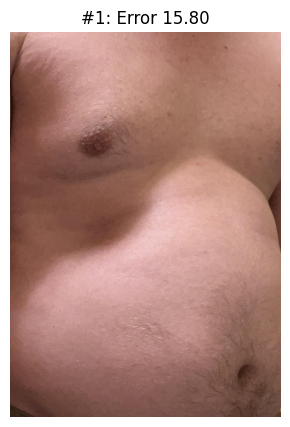

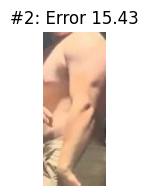

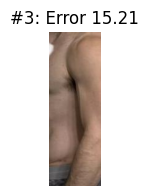

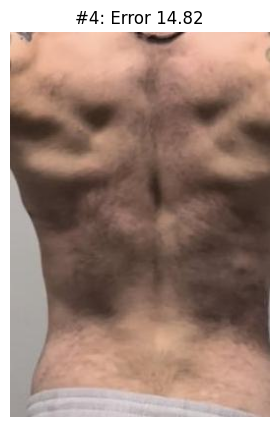

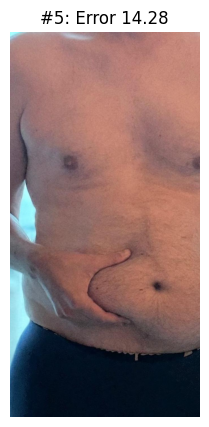

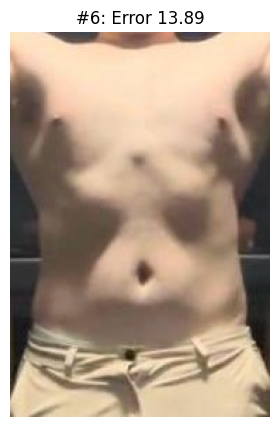

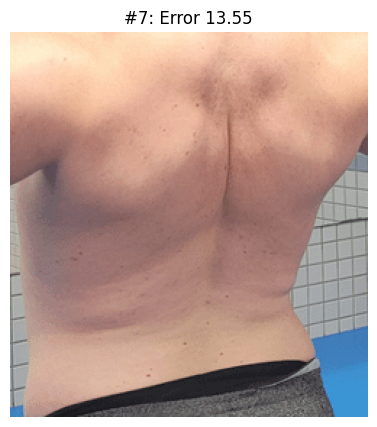

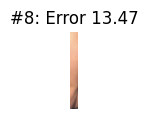

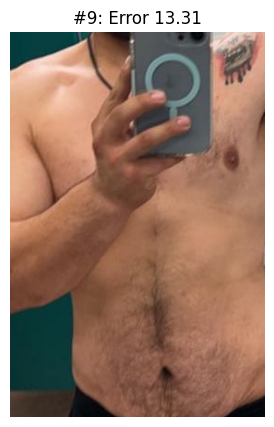

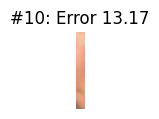

In [66]:
errors = []

# Create tqdm progress bar
pbar = tqdm(df.iterrows(), total=len(df), desc="Processing images", leave=True)

for i, row in pbar:
    try:
        img_path = f"{row['cropped_path']}"  # change if your image path differs
        img = PILImage.create(img_path)
        bf, _, probs = learn.predict(img)
        pred = float(probs[0])
        actual = float(row['target'])
        error = abs(pred - actual)

        errors.append({
            "img_path": img_path,
            "img": img,
            "actual": actual,
            "pred": pred,
            "error": error
        })

        # Optionally update progress bar postfix
        pbar.set_postfix({"last_error": f"{error:.2f}"})

    except Exception as e:
        pbar.write(f"Skipping {row['cropped_path']} due to error: {e}")

# Sort and show top 10 worst predictions
top_errors = sorted(errors, key=lambda x: x['error'], reverse=True)[:10]

for idx, item in enumerate(top_errors):
    print(f"\n#{idx+1}")
    print(f"File: {item['img_path']}")
    print(f"Predicted: {item['pred']:.2f}")
    print(f"Actual: {item['actual']:.2f}")
    print(f"Error: {item['error']:.2f}")
    show_image(item['img'], title=f"#{idx+1}: Error {item['error']:.2f}")
